In [1]:
import numpy as np # For Mathmatical 
import pandas as pd # For sructure the Datasets
import scipy.stats as stats # For Statistical Tests
from statsmodels.api import OLS #OLS Purpose
import matplotlib.pyplot as plt # Plots and Visualization
import seaborn as sns # Plots and Visualization
from mlxtend.plotting import plot_decision_regions #Visualization


# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from statsmodels.api import Logit
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
import statsmodels.api as sma


%matplotlib inline 
plt.rcParams["figure.figsize"] = [15,8] # Setting figure size default

In [2]:
# Because we have more no of rows and columns so we set the option for desplying more no of rows
pd.set_option('max_columns',None)
pd.set_option('max_rows',65)

from warnings import filterwarnings
filterwarnings('ignore')

## Data Description :

**Encounter ID** - Unique identifier of an encounter

**Patient number** - Unique identifier of a patient

**Race** – Race of patient (Caucasian, Asian, African American, Hispanic, and other)

**Gender** - Male, Female, and unknown/invalid

**Age** - Grouped in 10-year intervals: 0-10, 10-20, etc

**Weight** - Weight in pounds

**Admission type** - Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, new-born and not available

**Discharge disposition** - Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source** - Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

**Time in hospital** - Integer number of days between admission and discharge

**Payer code** - Integer identifier corresponding to 23 distinct values, for example, Blue Cross\Blue Shield, Medicare, and self-pay

**Medical specialty**- Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family\general practice, and surgeon

**Number of lab procedures** - Number of lab tests performed during the encounter

**Number of procedures** - Number of procedures (other than lab tests) performed during the encounter

**Number of medications** - Number of distinct generic names administered during the encounter

**Number of outpatient visits** - Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits** - Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits** - Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1** - The primary diagnosis (coded as first three digits of ICD 9); 848 distinct values

**Diagnosis 2** - Secondary diagnosis (coded as first three digits of ICD 9); 923 distinct values

**Diagnosis 3** - Additional secondary diagnosis (coded as first three digits of ICD 9); 954 distinct values

**Number of diagnoses** - Number of diagnoses entered to the system

**Glucose serum test result** - Indicates the range of the result or if the test was not taken. 

**A1c test result** - Indicates the range of the result or if the test was not taken. 

Metformin** - sold under the brand name Glucophage among others, is the first-line medication for the treatment of type 2 
diabetes, particularly in people who are overweight. 

**Repaglinide** - is used alone or with other medications to control high blood sugar along with a proper diet and exercise program. It is used in people with type 2 diabetes.

**Nateglinide** - is a drug for the treatment of type 2 diabetes

**Chlorpropamide** - is an oral antihyperglycemic agent used for the treatment of non-insulin-dependent diabetes mellitus (NIDDM).

**Glimepiride** - is an oral diabetes medicine that is used together with diet and exercise to improve blood sugar control in adults with type 2 diabetes mellitus.

**Acetohexamide** - is a first-generation sulfonylurea medication used to treat diabetes mellitus type 2, particularly in people whose diabetes cannot be controlled by diet alone.

**Glipizide** - sold under the brand name Glucotrol among others, is an anti-diabetic medication of the sulfonylurea class used to treat type 2 diabetes

**Glyburide** - is a diabetes medicine used to help control blood sugar levels and treat type 2 diabetes.

**Tolbutamide** - is a first-generation potassium channel blocker, sulfonylurea oral hypoglycemic medication. This drug may be used in the management of type 2 diabetes if diet alone is not effective.

**Pioglitazone** - is a diabetes drug (thiazolidinedione-type, also called "glitazones") used along with a proper diet and exercise program to control high blood sugar in patients with type 2 diabetes.

**Rosiglitazone** - is an insulin sensitizing agent and thiazolidinedione that is indicated for the treatment of type 2 diabetes.

**Acarbose** - is an anti-diabetic drug used to treat diabetes mellitus type 2 and, in some countries, prediabetes.

**Miglitol** - is an oral anti-diabetic drug that acts by inhibiting the ability of the patient to break down complex carbohydrates into glucose.

**Troglitazone** - is an antidiabetic and anti-inflammatory drug, and a member of the drug class of the thiazolidinediones. It was prescribed for people with diabetes mellitus type 2.

**Tolazamide** - is an oral blood glucose lowering drug used for people with Type 2 diabetes. It is part of the sulfonylurea family.

**Citoglipton (Sitagliptin)** - Sitagliptin is a diabetes drug that works by increasing levels of natural substances called incretins. Incretins help to control blood sugar by increasing insulin release, especially after a meal. They also decrease the amount of sugar your liver makes.

**Glyburide-Metformin** - The combination of glyburide and metformin is used to treat type 2 diabetes (condition in which the body does not use insulin normally and therefore cannot control the amount of sugar in the blood) in people whose diabetes cannot be controlled by diet and exercise alone.

**Glipizide-Metformin** - Glipizide and Metformin combination is used to treat high blood sugar levels that are caused by a type of diabetes mellitus or sugar diabetes called type 2 diabetes

**Glimepiride-Pioglitazone** - Pioglitazone and glimepiride combination is used with proper diet and exercise to treat high blood sugar levels caused by type 2 diabetes. Pioglitazone works by helping your body use insulin better. Glimepiride stimulates the release of insulin from the pancreas which will help your body turn food into energy

**Metformin-Rosiglitazone** - Rosiglitazone and metformin combination is used to treat a type of diabetes mellitus called type 2 diabetes. It is used together with a proper diet and exercise to help control blood sugar levels.

**Metformin-Pioglitazone** - Metformin/pioglitazone is used to improve blood sugar control in adults with type 2 diabetes. It's used along with diet and exercise. Metformin/pioglitazone isn't used to treat type 1 diabetes.

**24 features for medications** - The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Change of medications** - Indicates if there was a change in diabetic medications (either dosage or generic name).

**Diabetes medications** - Indicates if there was any diabetic medication prescribed

**Readmitted** - Whether the Patient was Readmitted or not OR whether the Patient was readmitted within 30 days or not.

In [3]:
# Reading Data
data = pd.read_csv('diabetic_data.csv')

In [4]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Checking Shape and Information of Data

In [5]:
data.shape

(101766, 50)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [7]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Distributing Data for Simpler Working

In [8]:
data1 = data.loc[:,["encounter_id","patient_nbr","race","gender","age","weight","admission_type_id","discharge_disposition_id","admission_source_id",
                           "time_in_hospital","readmitted"]]

data2 = data[['readmitted']].join(data.iloc[:,10:22])

data3 = data[['readmitted']].join(data.iloc[:,22:47]) # Complete Drugs Data

data4 = data.iloc[:,47:]

In [9]:
# Replacing Value in Change Variable from Ch to Yes
data4.change = data4.change.replace('Ch','Yes')

# **Target Distribution**

In [10]:
target = data.readmitted.copy()
Target = pd.DataFrame(data = target)
Target.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [11]:
target.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

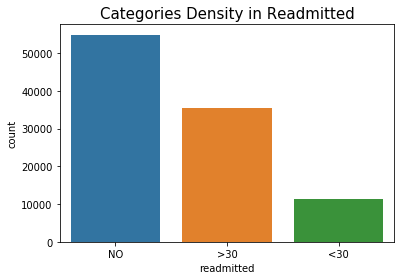

In [12]:
# First thing the encounter_id with target (readmitted) not make any possible sense but let understand is there any inside
# Lets first handle target variable
sns.countplot(target)
plt.title("Categories Density in Readmitted",fontsize = 15)
plt.show()

In [13]:
### As we see here we have 3 catagories
## NO----> patient not admitted any more
## >30---> admitted but after 30 days
## <30---> admitted befor 30 days
# By using that we can say that our most prior targets are the paitent who admit before 30 days then next is after 30 days
# Lets check the percentage of those target patients

In [14]:
# Paitent admitted before 30 days (<30) <First Proirity in analysis>
print(target.value_counts()[2]," that much number of patients are admitted before 30 days.")
print(round((target.value_counts()[2]/len(target))*100,2)," that much percent patients are admitted before 30 days")

11357  that much number of patients are admitted before 30 days.
11.16  that much percent patients are admitted before 30 days


In [15]:
# patients are admitted but after 30 days (>30) <Second Priority in Analysis>
print(target.value_counts()[1]," that much number of patients are admitted but after 30 days.")
print(round((target.value_counts()[1]/len(target))*100,2)," that much percent patients are admitted after 30 days")

35545  that much number of patients are admitted but after 30 days.
34.93  that much percent patients are admitted after 30 days


In [16]:
# People Not readmitted
print(target.value_counts()[0]," that much people are not readmitted, numbers.")
print(round((target.value_counts()[0]/len(target))*100,2)," That much percent people are not readmitted.")

54864  that much people are not readmitted, numbers.
53.91  That much percent people are not readmitted.


# **Data1 Analysis:**

In [17]:
data1_num = data1.select_dtypes(include = [np.number]) # Numerical columns
data1_cat = data1.select_dtypes(include=[np.object]) # Catagorical columns

In [18]:
data1_num.admission_type_id.value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [19]:
################admission_type_id####################

In [20]:
## 6-->Null
print(round((data1_num.admission_type_id[data1_num.admission_type_id == 6].count()/len(data1_num.admission_type_id))*100,2),\
      " percent missing values are there in admission_type_id column assigned as 6 in column.")

5.2  percent missing values are there in admission_type_id column assigned as 6 in column.


In [21]:
## 5-->Not available
print(round((data1_num.admission_type_id[data1_num.admission_type_id == 5].count()/len(data1_num.admission_type_id))*100,2),\
      " percent patients assigned as Not Available")

4.7  percent patients assigned as Not Available


In [22]:
## 8-->Not mapped
print(round((data1_num.admission_type_id[data1_num.admission_type_id == 8].count()/len(data1_num.admission_type_id))*100,2),\
      " percent patient are assigned as Not Mapped(Hospitals wont assign type of admission).")

0.31  percent patient are assigned as Not Mapped(Hospitals wont assign type of admission).


### Mapping Changes

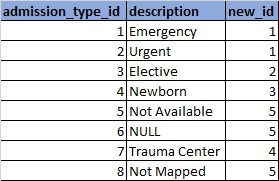

In [23]:
# Admission Type ID
from IPython.display import Image
Image(filename='admission_type_id_mapping.jpeg')

In [24]:
data1.admission_type_id = data1.admission_type_id.map({1:1,2:1,3:2,4:3,5:5,6:5,7:4,8:5})

In [25]:
################discharge_disposition_id###################

In [26]:
data1_num.discharge_disposition_id.describe(include = "all")

count    101766.000000
mean          3.715642
std           5.280166
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          28.000000
Name: discharge_disposition_id, dtype: float64

In [27]:
## 18--> Null
print(data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 18].count()," is the count of missing values")
print(round((data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 18].count()/len(data1_num.discharge_disposition_id))*100,2),\
      " percent missing values in discharge_disposition_id column assigned as 18 in column.")

3691  is the count of missing values
3.63  percent missing values in discharge_disposition_id column assigned as 18 in column.


In [28]:
## 25 -->Not Mapped
print(data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 25].count()," are the patients who won't fill the Discharge reason")
print(round((data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 25].count()/len(data1_num.discharge_disposition_id))*100,2),\
      " percent of total data.")

989  are the patients who won't fill the Discharge reason
0.97  percent of total data.


In [29]:
## 26 -->Unknown/Invalid
print(data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 26].count()," is the count of missing values")
print(round((data1_num.discharge_disposition_id[data1_num.discharge_disposition_id == 26].count()/len(data1_num.discharge_disposition_id))*100,2),\
      " percent missing values are there in discharge_disposition_id column assigned as 26 in column.")

0  is the count of missing values
0.0  percent missing values are there in discharge_disposition_id column assigned as 26 in column.


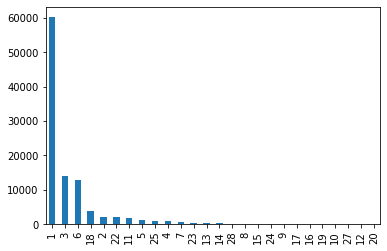

In [30]:
data1.discharge_disposition_id.value_counts().plot.bar()

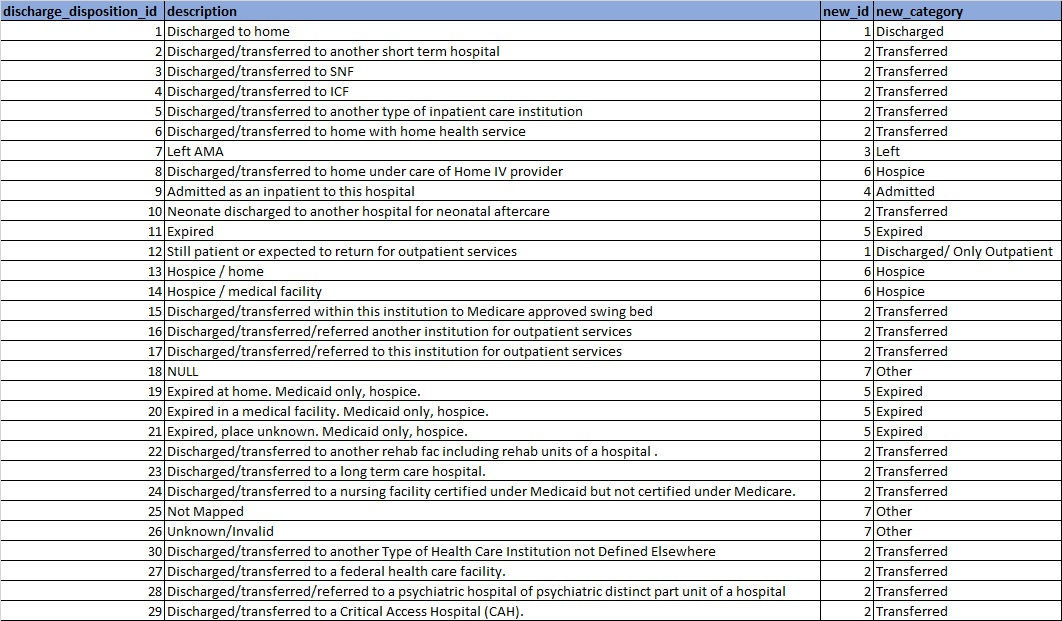

In [31]:
# Discharge Disposition_ID
from IPython.display import Image
Image(filename='discharge_mapping.jpeg')

In [32]:
def discharge_disposition_id_mapper(x):
    if x in [1,12]:
        return 1
    elif x in [2,3,4,5,6,10,15,16,17,22,23,24,27,28,29,30]:
        return 2
    elif x in [7]:
        return 3
    elif x in [9]:
        return 4
    elif x in [11,19,20,21]:
        return 5
    elif x in [8,13,14]:
        return 6
    else:
        return 7
    
data1.discharge_disposition_id = data1.discharge_disposition_id.apply(discharge_disposition_id_mapper)

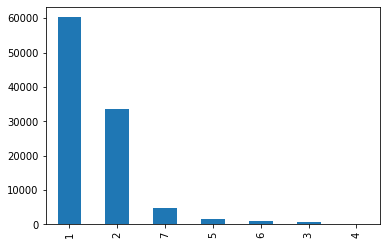

In [33]:
# Other/Unknown Values Analysis --> Discharge Disposition ID
data1.discharge_disposition_id.value_counts().plot.bar()

   Majority Patients fall under Category of **Discharged** or **Transferred**!

In [34]:
##############admission_source_id####################
data1_num.admission_source_id.describe(include = "all")

count    101766.000000
mean          5.754437
std           4.064081
min           1.000000
25%           1.000000
50%           7.000000
75%           7.000000
max          25.000000
Name: admission_source_id, dtype: float64

In [35]:
# Invalid Null values Indentification
data1_num.isnull().sum()

encounter_id                0
patient_nbr                 0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
dtype: int64

In [36]:
## 17--> Null
print(data1_num.admission_source_id[data1_num.admission_source_id == 17].count()," is the count of missing values")
print(round((data1_num.admission_source_id[data1_num.admission_source_id == 17].count()/len(data1_num.admission_source_id))*100,2),\
      " percent missing values are there in admission_source_id column assigned as 17 in column.")

6781  is the count of missing values
6.66  percent missing values are there in admission_source_id column assigned as 17 in column.


In [37]:
## 20 -->Not Mapped
print(data1_num.admission_source_id[data1_num.admission_source_id == 20].count()," is the count of missing values")
print(round((data1_num.admission_source_id[data1_num.admission_source_id == 20].count()/len(data1_num.admission_source_id))*100,2),\
      " percent missing values are there in admission_source_id column assigned as 20 in column.")

161  is the count of missing values
0.16  percent missing values are there in admission_source_id column assigned as 20 in column.


In [38]:
## 21 -->Unknown/Invalid
print(data1_num.admission_source_id[data1_num.admission_source_id == 21].count()," is the count of missing values")
print(round((data1_num.admission_source_id[data1_num.admission_source_id == 21].count()/len(data1_num.admission_source_id))*100,2),\
      " percent missing values are there in admission_source_id column assigned as 21 in column.")

0  is the count of missing values
0.0  percent missing values are there in admission_source_id column assigned as 21 in column.


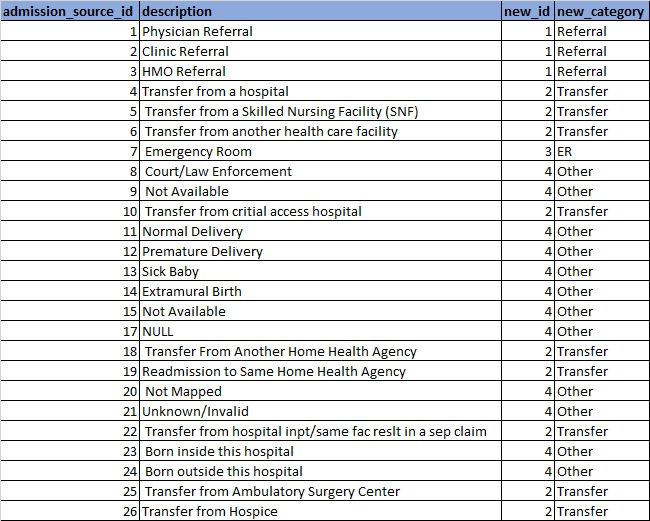

In [39]:
# Admission Source_ID
from IPython.display import Image
Image(filename='admission_source_id_mapping.jpeg')

In [40]:
def admission_source_id_mapper(x):
    if x in [1,2,3]:
        return 1
    elif x in [4,5,6,10,18,19,22,25,26]:
        return 2
    elif x in [7]:
        return 3
    else:
        return 4
data1.admission_source_id = data1.admission_source_id.apply(admission_source_id_mapper)

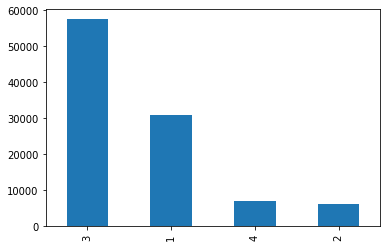

In [41]:
# Other/Unknown Values Analysis --> Admission_Source_id
data1.admission_source_id.value_counts().plot.bar()

Majority Patients source is either **Emergency** or **Referral**

In [42]:
############time_in_hospital###############

“time_in_hospital” represents number of days patient spent in the hospital.

In [43]:
data1_num.time_in_hospital.describe(include = "all")

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

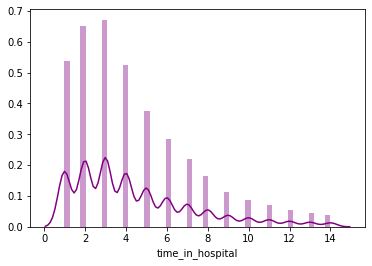

In [44]:
# Lets see the Distribution 
sns.distplot(data1_num.time_in_hospital,color = "purple")
plt.show()

On an Average patient spends **4.4 days** in hospital

In [45]:
data1_num.time_in_hospital.unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14],
      dtype=int64)

In [46]:
data1_cat.head()

,race,gender,age,weight,readmitted
0,Caucasian,Female,[0-10),?,NO
1,Caucasian,Female,[10-20),?,>30
2,AfricanAmerican,Female,[20-30),?,NO
3,Caucasian,Male,[30-40),?,NO
4,Caucasian,Male,[40-50),?,NO


In [47]:
############race########################

# **categories** in race column
'Caucasian', 'AfricanAmerican', '?', 'Hispanic', 'Other', 'Asian'


In [48]:
data1_cat.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [49]:
## invalid assignment in race column
print(data1_cat.race[data1_cat.race == "?"].count()," is the count of invalid assign catagory")
print(round((data1_cat.race[data1_cat.race == "?"].count()/len(data1_cat.race))*100,2),\
      " percent datapoints are assigned wrongly in race column.")

2273  is the count of invalid assign catagory
2.23  percent datapoints are assigned wrongly in race column.


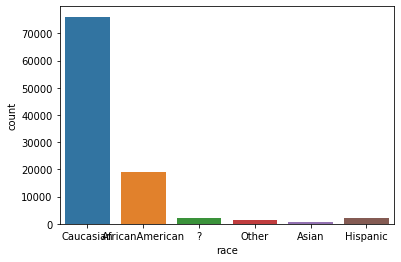

In [50]:
# Lets check which catagory is more dence
sns.countplot(data1_cat.race)
plt.show()

Around **76%** of the patients we have in the data are **Caucasian** i.e. White, with **African-Americans** patients in the data being around **19%**

In [51]:
# Converting ? to NAN
data1.race.replace('?','Other',inplace=True)

# **Categories** in Gender Column
'Female', 'Male', 'Unknown/Invalid'

In [52]:
data1.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [53]:
# Removing Unknown/Invalid rows in Gender as they are only 3 out of 100000+ records!
data1 = data1[~(data1['gender']=='Unknown/Invalid')]

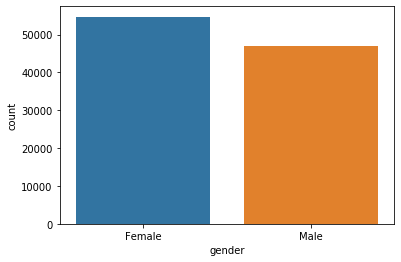

In [54]:
# Drow counplot to understand the density
sns.countplot(data1.gender)
plt.show()

In [55]:
data1_cat.columns

Index(['race', 'gender', 'age', 'weight', 'readmitted'], dtype='object')

# **Categories** in Age column
'[70-80)', '[60-70)', '[50-60)', '[80-90)', '[40-50)', '[30-40)',
       '[90-100)', '[20-30)', '[10-20)', '[0-10)'

In [56]:
data1.age.value_counts()

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [57]:
data1['age'] = data1['age'].str.replace('[','')
data1['age'] = data1['age'].str.replace(')','')

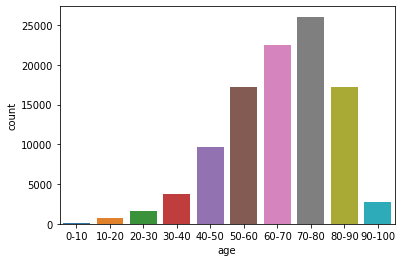

In [58]:
# Lets check the dencity of people who come in Hospiat in age of
sns.countplot(data1.age)
plt.show()

Majority Patients fall under the ages from **50-90**

In [59]:
#############################weight##################################
data1.weight.value_counts()

?            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

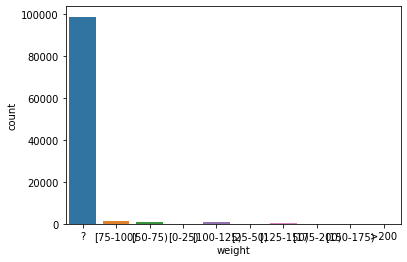

In [60]:
# plot the distribution
sns.countplot(data1.weight)
plt.show()

In [61]:
## invalid assignment in weight column
print(data1_cat.weight[data1_cat.weight == "?"].count()," is the count of invalid assign catagory")
print(round((data1_cat.weight[data1_cat.weight == "?"].count()/len(data1_cat.weight))*100,2),\
      " percent datapoints are assigned wrongly in weight column.")

98569  is the count of invalid assign catagory
96.86  percent datapoints are assigned wrongly in weight column.


In [62]:
# Converting ? to NAN
data1.replace('?',np.nan,inplace=True)

In [63]:
#################patient nbr#####################

In [64]:
pd.crosstab(data1.patient_nbr,data1.readmitted)

readmitted,<30,>30,NO
patient_nbr,,,
135,1,1,0
378,0,0,1
729,0,0,1
774,0,0,1
927,0,0,1
...,...,...,...
189351095,0,0,1
189365864,0,0,1
189445127,0,0,1


In [65]:
# Sorting the columns according to their Data Types
num = data1.select_dtypes(include=[np.number]) ## Numerical Columns
cat = data1.select_dtypes(include = [np.object]) ## Categorical Columns

In [66]:
## admission_source_id
pd.crosstab(data1.admission_source_id,data1.readmitted)

readmitted,<30,>30,NO
admission_source_id,,,
1,3270,10008,17577
2,624,1311,4393
3,6720,21667,29105
4,743,2559,3786


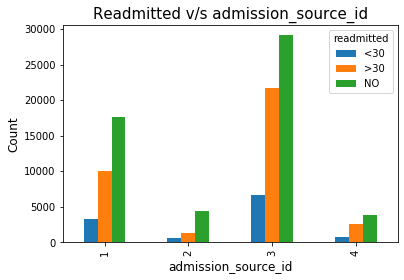

In [67]:
pd.crosstab(data1.admission_source_id,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s admission_source_id", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("admission_source_id",fontsize = 12)
plt.show()

In [68]:
# as wee see here most of the patients who admitted are by Physician Referral (1) or refer by Emergency Room
# 17 that have Null values.

In [69]:
##time_in_hospital
pd.crosstab(data1.time_in_hospital,data1.readmitted)

readmitted,<30,>30,NO
time_in_hospital,,,
1,1162,4471,8573
2,1712,5919,9593
3,1894,6085,9777
4,1644,5064,7216
5,1199,3586,5181
6,949,2755,3835
7,752,2123,2984
8,625,1589,2176
9,412,1099,1491


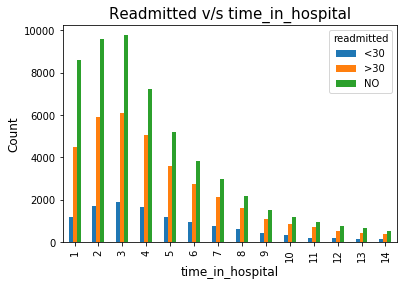

In [70]:
pd.crosstab(data1.time_in_hospital,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s time_in_hospital", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("time_in_hospital",fontsize = 12)
plt.show()

**Higher** the **time_in_hospital** i.e. the duration the patients was admitted in the hospital for, the **lower the likelihood** of their re-admission

The patients who were under hospital care for longer, are less likely to be readmitted.

In [71]:
## race
pd.crosstab(data1.race,data1.readmitted)

readmitted,<30,>30,NO
race,,,
AfricanAmerican,2155,6634,10421
Asian,65,161,415
Caucasian,8592,27124,40383
Hispanic,212,642,1183
Other,333,984,2459


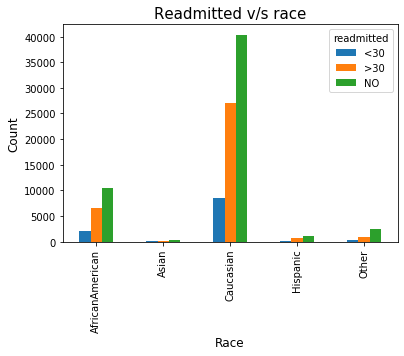

In [72]:
pd.crosstab(data1.race,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s race", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Race",fontsize = 12)
plt.show()

In [73]:
## admission_type_id
pd.crosstab(data1.admission_type_id,data1.readmitted)

readmitted,<30,>30,NO
admission_type_id,,,
1,8287,25761,38420
2,1961,5746,11161
3,1,2,7
4,0,0,21
5,1108,4036,5252


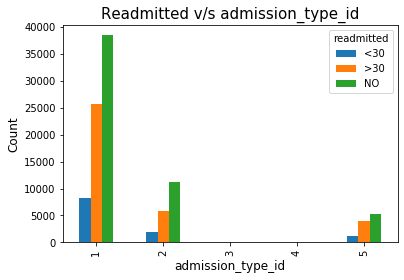

In [74]:
pd.crosstab(data1.admission_type_id,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s admission_type_id", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("admission_type_id",fontsize = 12)
plt.show()

In [75]:
### discharge_disposition_id
pd.crosstab(data1.discharge_disposition_id,data1.readmitted)

readmitted,<30,>30,NO
discharge_disposition_id,,,
1,5604,21517,33114
2,5045,12321,16307
3,90,221,312
4,9,2,10
5,0,0,1652
6,58,81,740
7,551,1403,2726


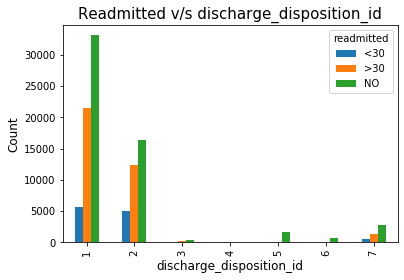

In [76]:
pd.crosstab(data1.discharge_disposition_id,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s discharge_disposition_id", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("discharge_disposition_id",fontsize = 12)
plt.show()

In [77]:
### age
pd.crosstab(data1.age,data1.readmitted)

readmitted,<30,>30,NO
age,,,
0-10,3,26,132
10-20,40,224,427
20-30,236,510,911
30-40,424,1187,2164
40-50,1027,3278,5380
50-60,1668,5917,9671
60-70,2502,7897,12083
70-80,3069,9475,13522
80-90,2078,6223,8896


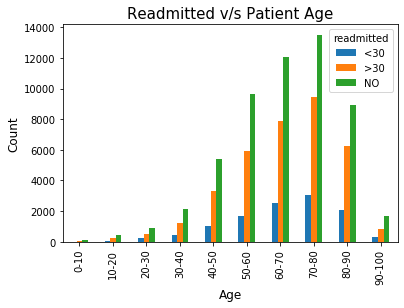

In [78]:
pd.crosstab(data1.age,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s Patient Age", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Age",fontsize = 12)
plt.show()

**Higher Age** increases the **likelihood of readmission**

In [79]:
## Weight
pd.crosstab(data1.weight,data1.readmitted)

readmitted,<30,>30,NO
weight,,,
>200,0,3,0
[0-25),8,31,9
[100-125),67,292,266
[125-150),12,69,64
[150-175),3,16,16
[175-200),1,5,5
[25-50),8,42,47
[50-75),105,389,403
[75-100),153,663,520


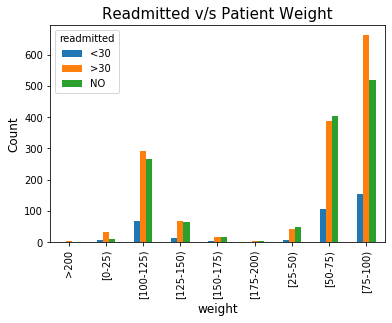

In [80]:
# post conversion of ? to nan
pd.crosstab(data1.weight,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s Patient Weight", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("weight",fontsize = 12)
plt.show()

In [82]:
## Gender VS target
pd.crosstab(data1.gender,data1.readmitted)

readmitted,<30,>30,NO
gender,,,
Female,6152,19518,29038
Male,5205,16027,25823


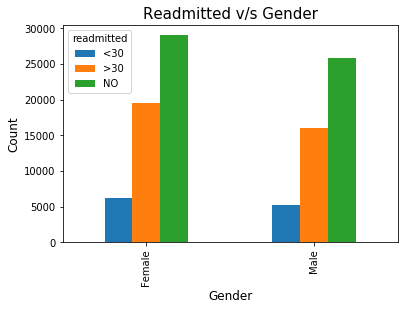

In [83]:
pd.crosstab(data1.gender,data1.readmitted).plot(kind = "bar")
plt.title("Readmitted v/s Gender", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Gender",fontsize = 12)
plt.show()

No particular inference could be drawn from here!

Ratio of Males and Females getting Readmitted are same!

# **Data 2 Analysis:**

## **Unique Values Present:**

In [84]:
for i in data2.columns:
    print('{} :: {}\n'.format(i,data2[i].unique()))

readmitted :: ['NO' '>30' '<30']

payer_code :: ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']

medical_specialty :: ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' 'Neurology' 'Anesthesiology-Pediatric'
 'Radiology' 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry'
 'Gynecology' 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic'
 'Surgery-Thoracic' 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology'
 'Surgery-Pediatric' 'Pediatrics-EmergencyMedicine'
 'Physi

# **Value Changes**

In [85]:
data2.payer_code.replace('?',np.nan,inplace=True)
data2.medical_specialty.replace('?',np.nan,inplace=True)
data2.diag_2.replace('?',np.nan,inplace=True)
data2.diag_3.replace('?',np.nan,inplace=True)

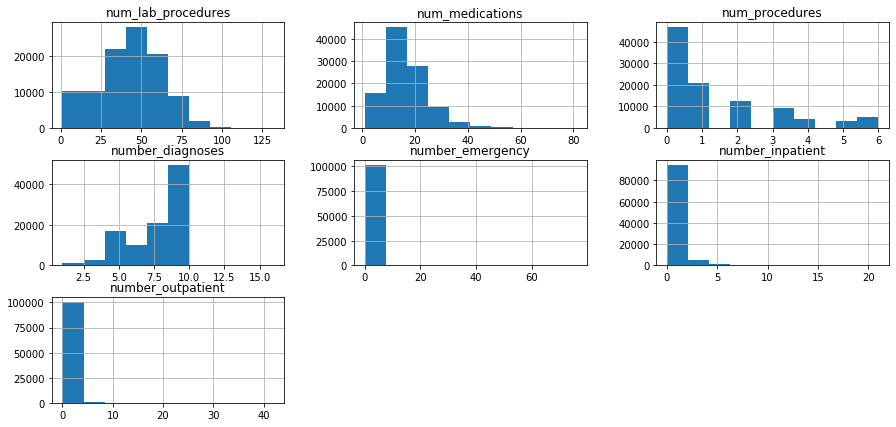

In [86]:
data2.hist(figsize=(15,7))
plt.show()

In [87]:
cat_cols = data2.select_dtypes('object').columns
num_cols = data2.select_dtypes(np.number).columns

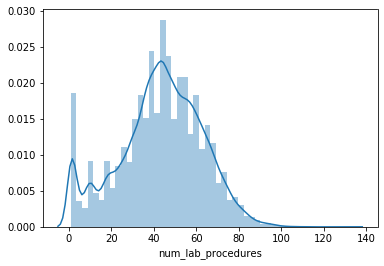

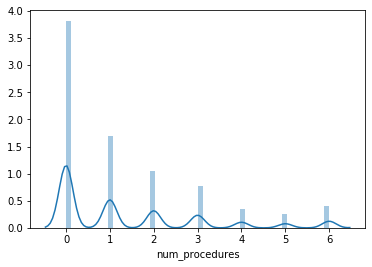

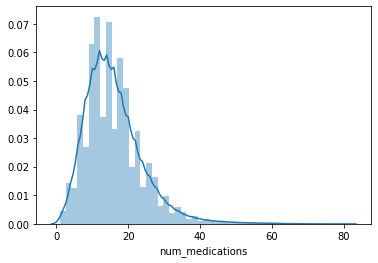

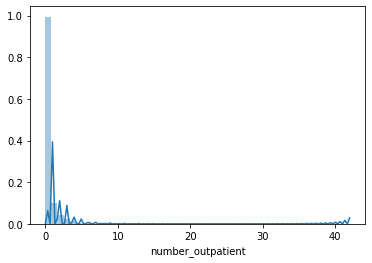

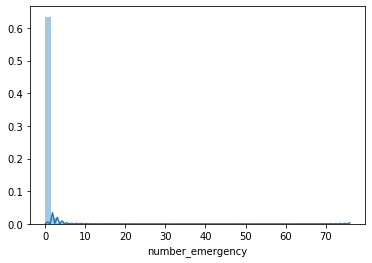

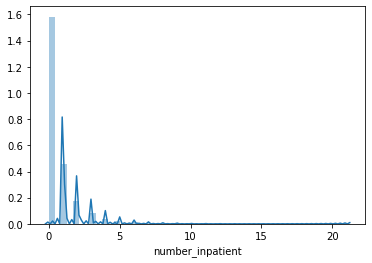

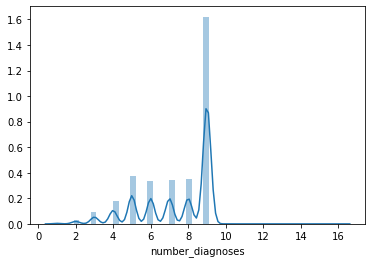

In [88]:
for i in num_cols:
    sns.distplot(data2[i])
    plt.show()

#**We can see that there are Lot of Outliers here:**
    * num_lab_procedures
    * num_medications
    * number_outpatient
    * number_emergency
    * number_inpatient
    * number_diagnoses

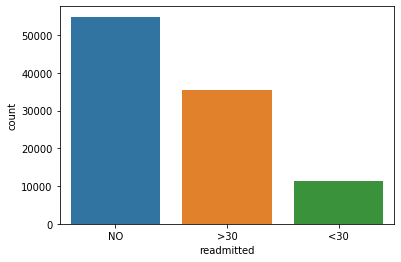

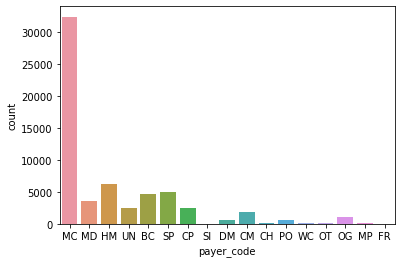

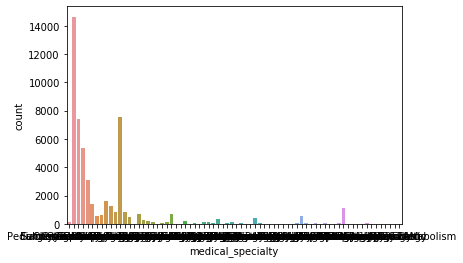

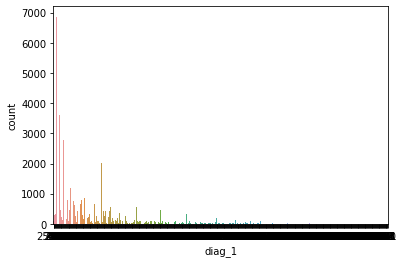

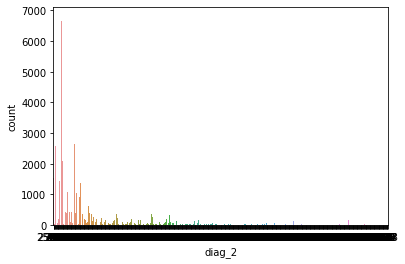

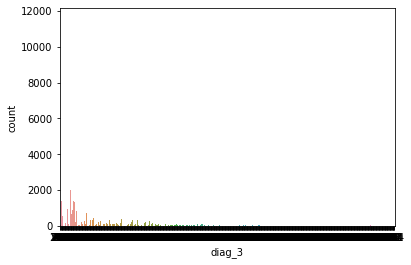

In [89]:
for i in cat_cols:
    sns.countplot(data2[i])
    plt.show()
    
# cat_cols

* We can see that there are Extremely Large Number of Categories in diag1,diag2,diag3 approx(700 in each that too Nominal Categories)

# **BiVariate Analysis**

Numerical Columns v/s Target

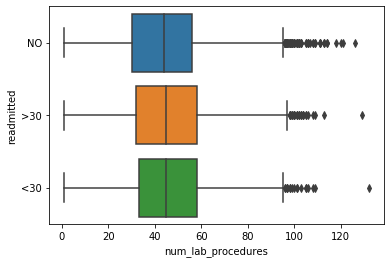

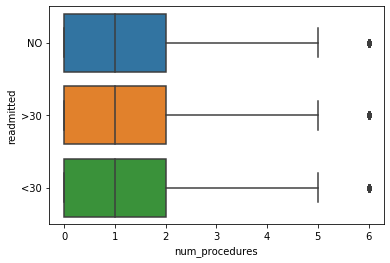

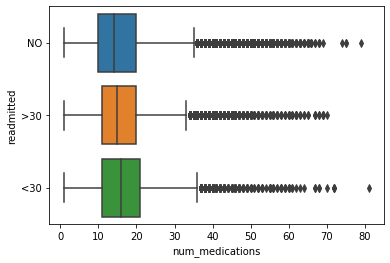

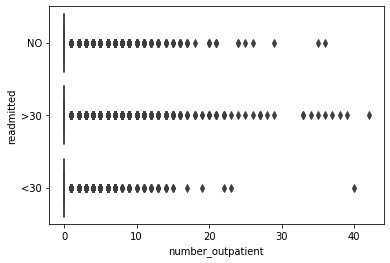

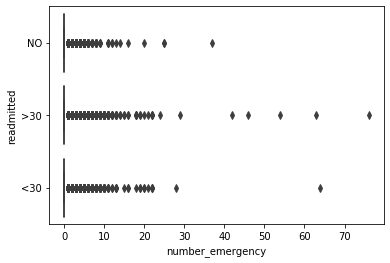

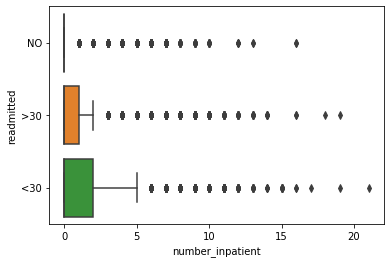

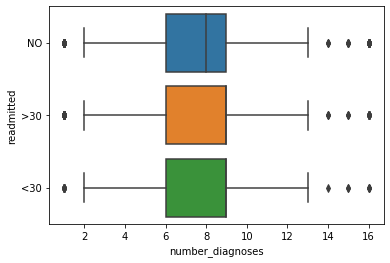

In [90]:
for i in num_cols:
    sns.boxplot(data2[i],data2.readmitted)
    plt.show()

Those patients who have undergone **higher Lab_Procedures** have **lesser chance of re-admission**

readmitted   <30    >30     NO
payer_code                    
BC           426   1301   2928
CH            13     33    100
CM           198    661   1078
CP           214    781   1538
DM            64    220    265
FR             0      0      1
HM           644   2320   3310
MC          3810  11982  16647
MD           416   1259   1857
MP             9     39     31
OG           136    333    564
OT             7     38     50
PO            44    144    404
SI             7     17     31
SP           510   1869   2628
UN           227    696   1525
WC             5     24    106 




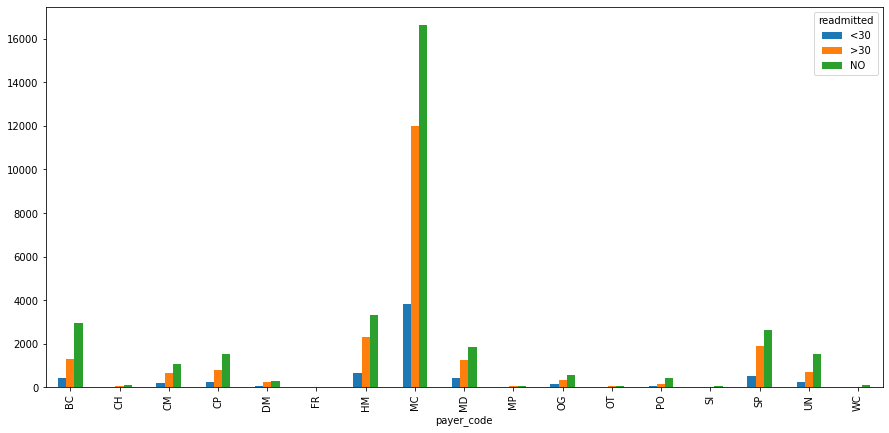

readmitted                        <30   >30    NO
medical_specialty                                
AllergyandImmunology                3     3     1
Anesthesiology                      1     3     8
Anesthesiology-Pediatric            1     5    13
Cardiology                        425  1853  3074
Cardiology-Pediatric                1     4     2
...                               ...   ...   ...
Surgery-PlasticwithinHeadandNeck    0     1     0
Surgery-Thoracic                   11    30    68
Surgery-Vascular                   74   200   259
SurgicalSpecialty                   2     9    22
Urology                            68   185   432

[72 rows x 3 columns] 




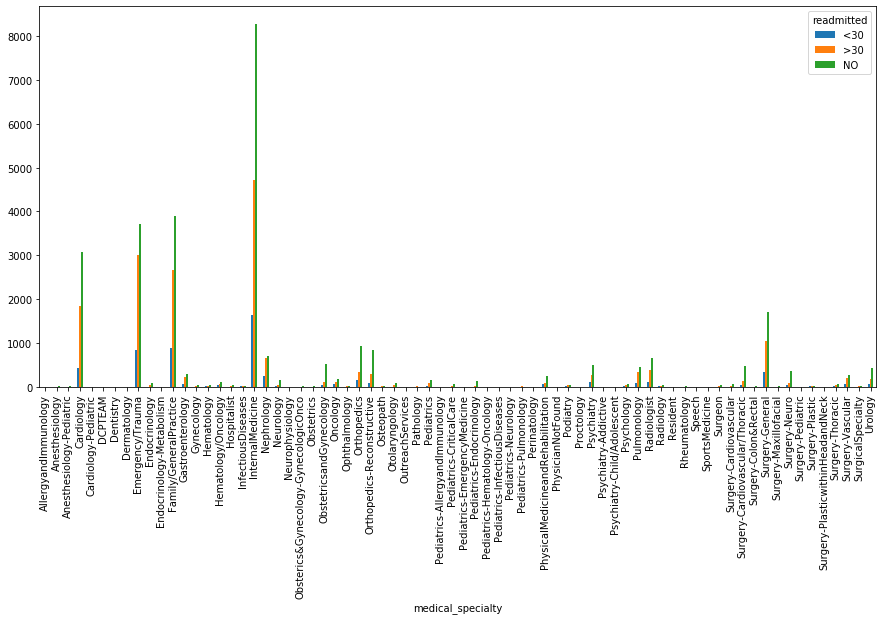

readmitted  <30  >30  NO
diag_1                  
10            0    0   1
11            0    3   7
110           0    1   1
112          14   26  33
114           0    1   0
...         ...  ...  ..
V63           1    1   6
V66           0    0   2
V67           0    1   0
V70           0    0   1
V71           0    2   7

[717 rows x 3 columns] 




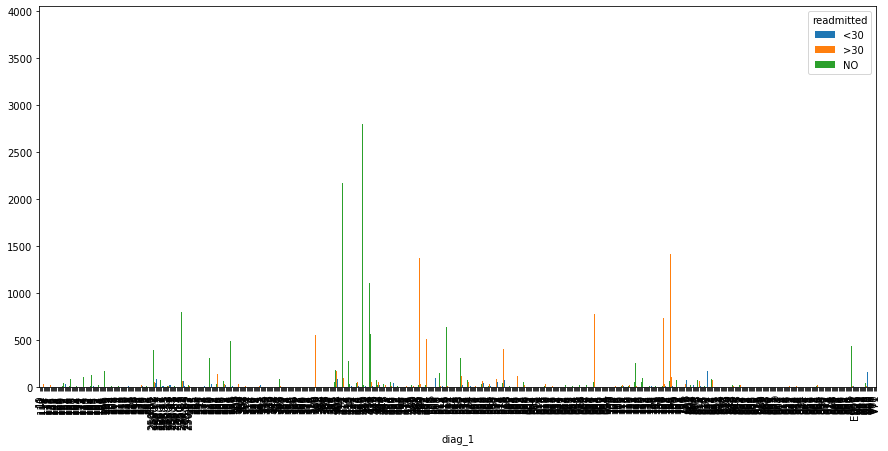

readmitted  <30  >30   NO
diag_2                   
11            1    1    1
110           2    3    3
111           0    0    1
112          28   75   98
114           1    0    0
...         ...  ...  ...
V69           0    0    1
V70           0    3    4
V72           0    1   12
V85          22   36  111
V86           0    1    1

[748 rows x 3 columns] 




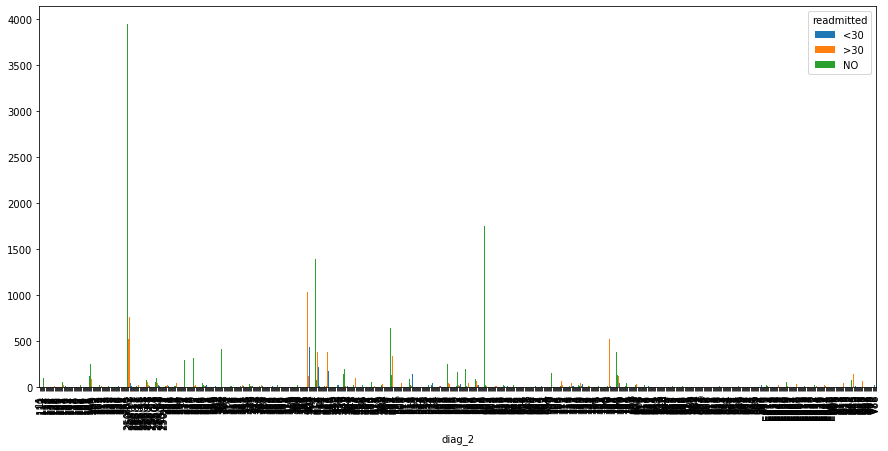

readmitted  <30  >30   NO
diag_3                   
11            1    0    1
110           2    6   12
111           1    0    0
112          22   73  111
115           0    0    1
...         ...  ...  ...
V66           1    3   14
V70           0    0    2
V72           1    1    6
V85           9   22   65
V86           0    1    2

[789 rows x 3 columns] 




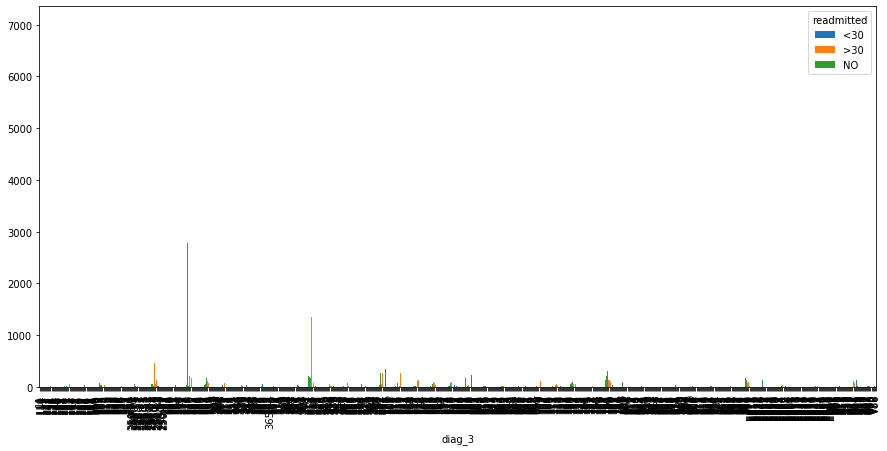

In [91]:
for i in cat_cols[1:]:
    print(pd.crosstab(data2[i],data2.readmitted),'\n\n')
    pd.crosstab(data2[i],data2.readmitted).plot(kind='bar',figsize=(15,7))
    plt.show()

* Can't conclude to any inference for the diag1,diag2 and diag3 columns
* MC payer_code has higher occurences out of all others

In [92]:
data2.diag_1.unique()

array(['250.83', '276', '648', '8', '197', '414', '428', '398', '434',
       '250.7', '157', '518', '999', '410', '682', '402', '737', '572',
       'V57', '189', '786', '427', '996', '277', '584', '462', '473',
       '411', '174', '486', '998', '511', '432', '626', '295', '196',
       '250.6', '618', '182', '845', '423', '808', '250.4', '722', '403',
       '250.11', '784', '707', '440', '151', '715', '997', '198', '564',
       '812', '38', '590', '556', '578', '250.32', '433', 'V58', '569',
       '185', '536', '255', '250.13', '599', '558', '574', '491', '560',
       '244', '250.03', '577', '730', '188', '824', '250.8', '332', '562',
       '291', '296', '510', '401', '263', '438', '70', '250.02', '493',
       '642', '625', '571', '738', '593', '250.42', '807', '456', '446',
       '575', '250.41', '820', '515', '780', '250.22', '995', '235',
       '250.82', '721', '787', '162', '724', '282', '514', 'V55', '281',
       '250.33', '530', '466', '435', '250.12', 'V53', '789', '

# **Diagnosis Codes**

```
Group name      icd9 codes

Circulatory     390–459, 785
Respiratory     460–519, 786
Digestive       520–579, 787
Diabetes        250.xx
Injury          800–999
Musculoskeletal 710–739
Genitourinary   580–629
Neoplasms       140–239,780, 781, 784, 790–799
                240–279, without 250
                680–709, 782
                001–139
                290–319
Other:          E–V
                280–289
                320–359
                630–679
                360–389
                740–759
```



* if icd_codes are missing, then filling with 'Others' in the Diagnoses kind.
* might delete icd9 codes later as the information is retained

Circulatory        30437
Respiratory        14423
Neoplasm           13887
Digestive           9475
Diabetic            8757
Others              7778
Injury              6974
Genitourinary       5078
Musculoskeletal     4957
Name: diag1_kind, dtype: int64


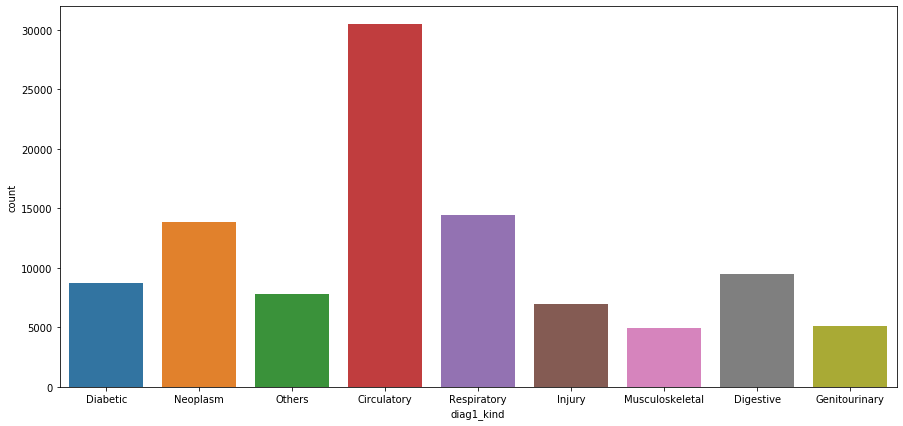

In [93]:
icd_circulatory = list(range(390,460))
icd_circulatory.append(785)
icd_circulatory = list(map(str,icd_circulatory))

icd_respiratory = list(range(460,520))
icd_respiratory.append(786)
icd_respiratory = list(map(str,icd_respiratory))

icd_digestive = list(range(520,580))
icd_digestive.append(787)
icd_digestive = list(map(str,icd_digestive))

icd_injury = list(range(800,1000))
icd_injury = list(map(str,icd_injury))

icd_musculoskeletal = list(range(710,740))
icd_musculoskeletal = list(map(str,icd_musculoskeletal))

icd_genitourinary = list(range(580,630))
icd_genitourinary = list(map(str,icd_genitourinary))

icd_neoplasms = list(range(1,280))
icd_neoplasms.extend(range(680,710))
icd_neoplasms.extend(range(290,320))
icd_neoplasms.extend(range(790,799))
icd_neoplasms.append(range(780,785))
icd_neoplasms.remove(250)
icd_neoplasms = list(map(str,icd_neoplasms))
# icd_neoplasms.remove(783)

def diabetic_check(x):
    if str(x) == np.nan:
        return np.nan
    elif str(x)[:3] == '250':
        return 'Diabetic'
    elif x in icd_circulatory:
        return 'Circulatory'
    elif x in icd_respiratory:
        return 'Respiratory'
    elif x in icd_digestive:
        return 'Digestive'
    elif x in icd_injury:
        return 'Injury'
    elif x in icd_musculoskeletal:
        return 'Musculoskeletal'
    elif x in icd_genitourinary:
        return 'Genitourinary'
    elif x in icd_neoplasms:
        return 'Neoplasm'
    else:
        return 'Others'

data2['diag1_kind'] = data2.diag_1.apply(diabetic_check)
print(data2['diag1_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag1_kind)
plt.show()

Circulatory        31881
Neoplasm           19274
Diabetic           12794
Respiratory        10895
Others             10573
Genitourinary       7987
Digestive           4170
Injury              2428
Musculoskeletal     1764
Name: diag2_kind, dtype: int64


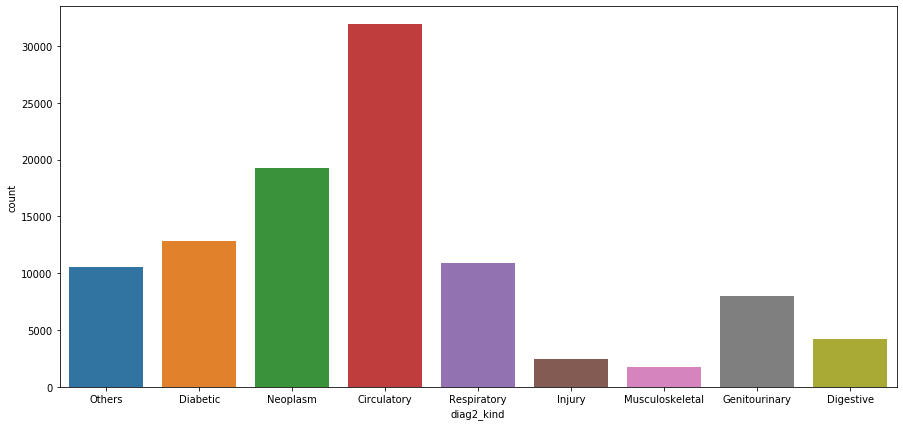

In [94]:
data2['diag2_kind'] = data2.diag_2.apply(diabetic_check)
print(data2['diag2_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag2_kind)
plt.show()

Circulatory        30306
Neoplasm           18851
Diabetic           17157
Others             13976
Respiratory         7358
Genitourinary       6327
Digestive           3930
Injury              1946
Musculoskeletal     1915
Name: diag3_kind, dtype: int64


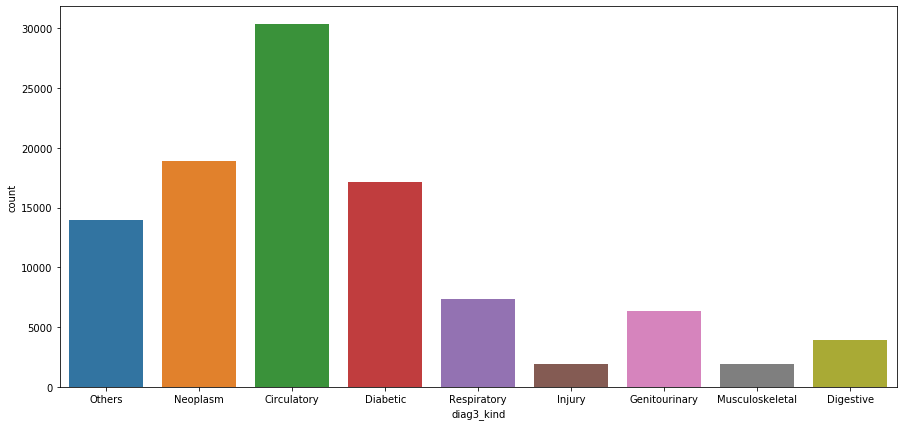

In [95]:
data2['diag3_kind'] = data2.diag_3.apply(diabetic_check)
print(data2['diag3_kind'].value_counts())

plt.figure(figsize=(15,7))
sns.countplot(data2.diag3_kind)
plt.show()

We can see that higher diagnosis done on patients are related to **Circulatory**, **Neoplasm** and **Diabetic** in diagnosis 1, 2 and 3 as well!

In [96]:
# Work in Progress
# Multidivision for Complications based on diagnoses

In [97]:
# filling null value complicatinos with other complications
def diabetes_complications(x):
    if pd.isnull(x):
        return 'other complications'
    elif x[:3]=='250':
        temp = x[4:5]
        if x=='250':
            return 'no complications'
        if temp == '0':
            return 'no complications'
        elif temp == '1':
            return 'ketoacidosis'
        elif temp == '2':
            return 'hypersmolarity'
        elif temp == '3':
            return 'other coma'
        elif temp == '4':
            return 'renal manifestation'
        elif temp == '5':
            return 'opthalmic manifestation'
        elif temp == '6':
            return 'neurological manifestation'
        elif temp == '7':
            return 'peripheral circulatory disorders'
        elif temp == '8':
            return 'specified complications'
        elif temp == '9':
            return 'unspecified complications'
        else:
            return 'no complications'
    else:
        return 'other complications'
    
data2['diag1_complications'] = data2['diag_1'].apply(diabetes_complications)
data2['diag2_complications'] = data2['diag_2'].apply(diabetes_complications)
data2['diag3_complications'] = data2['diag_3'].apply(diabetes_complications)

In [98]:
data2.isnull().sum()

readmitted                 0
payer_code             40256
medical_specialty      49949
num_lab_procedures         0
num_procedures             0
num_medications            0
number_outpatient          0
number_emergency           0
number_inpatient           0
diag_1                     0
diag_2                   358
diag_3                  1423
number_diagnoses           0
diag1_kind                 0
diag2_kind                 0
diag3_kind                 0
diag1_complications        0
diag2_complications        0
diag3_complications        0
dtype: int64

# Checking the Diagnosis Kind v/s Re-admission

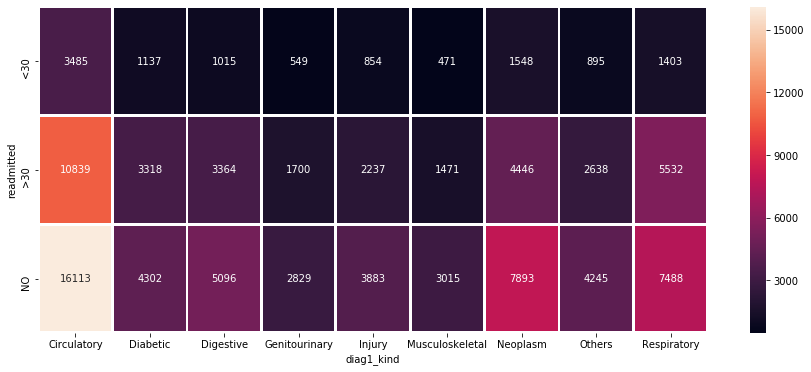

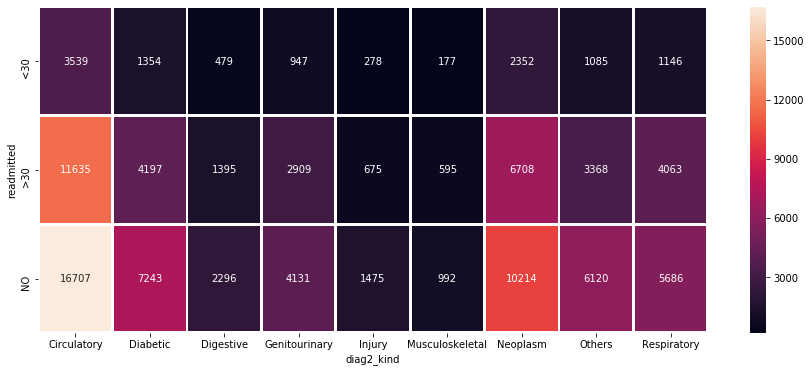

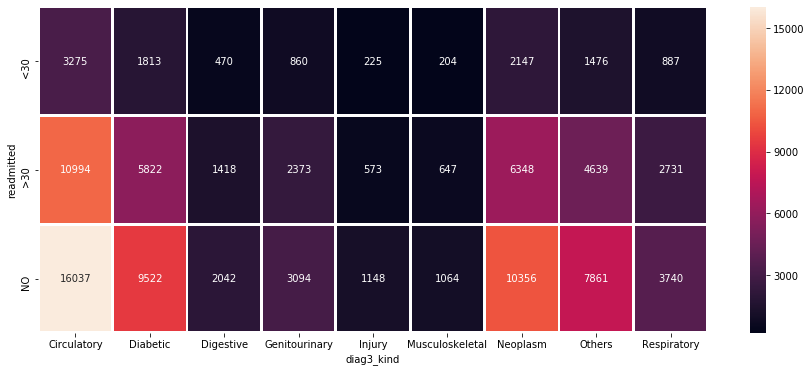

In [99]:
for i in (['diag1_kind','diag2_kind','diag3_kind']):
    ct = pd.crosstab(data2.readmitted,data2[i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

People suffering from **Circulatory and Neoplasmic** kind of diagnoses are more likely to get readmitted!

# Checking the Diagnosis Complications v/s Re-admission


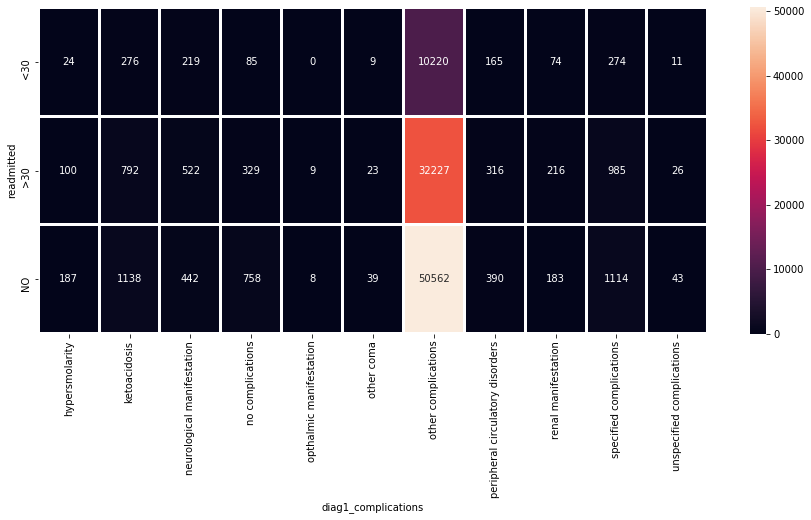

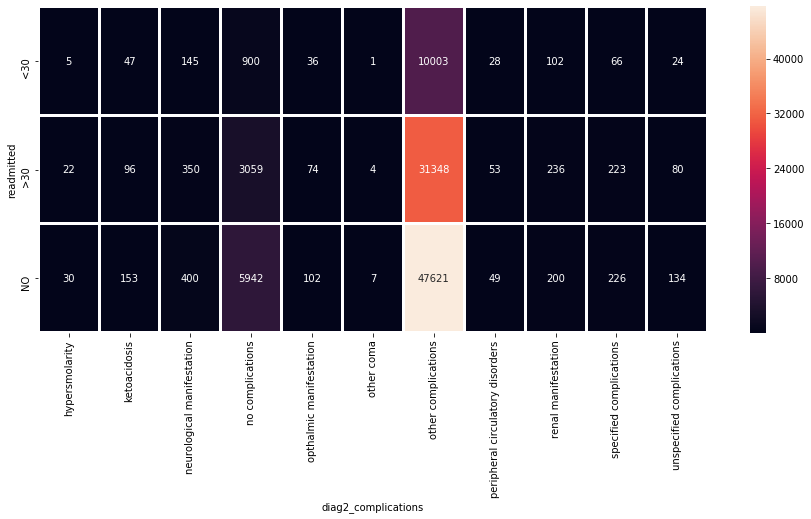

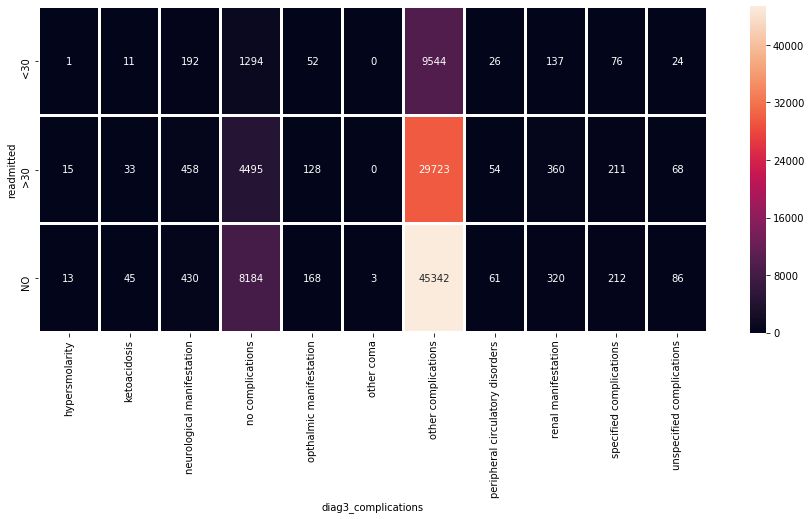

In [100]:
for i in (['diag1_complications','diag2_complications','diag3_complications']):
    ct = pd.crosstab(data2.readmitted,data2[i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

# Excluding Other Complications, lets look into complications v/s readmitted

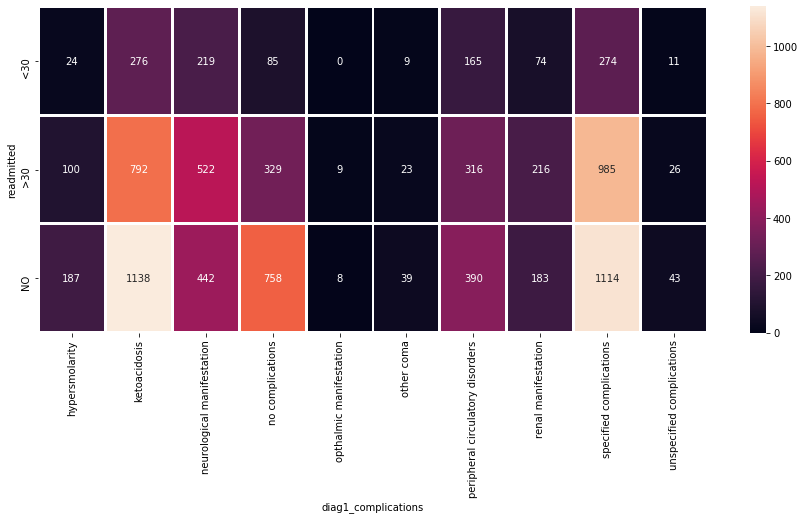

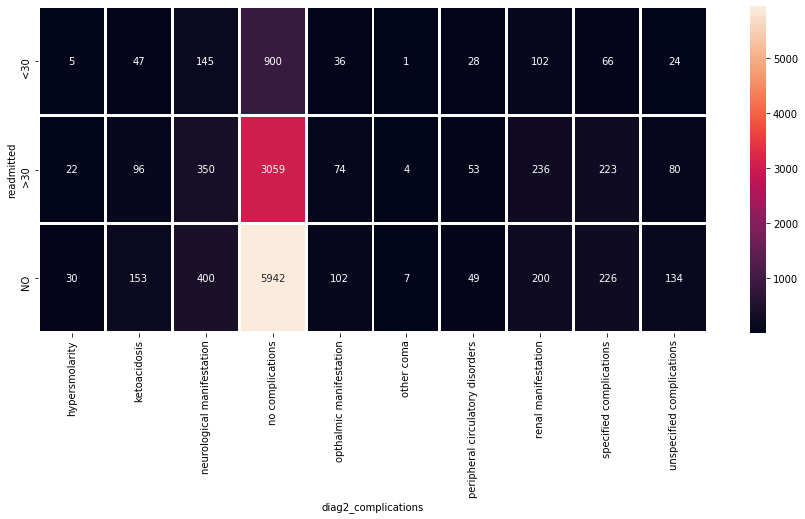

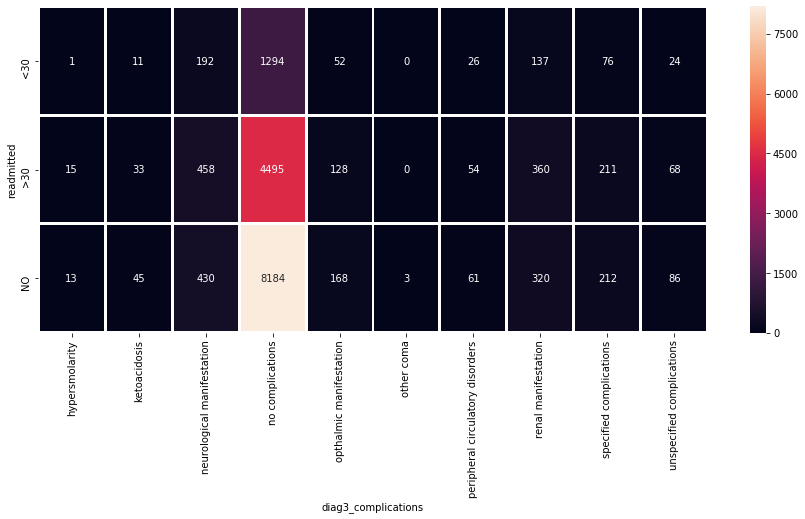

In [101]:
for i in (['diag1_complications','diag2_complications','diag3_complications']):
    ct = pd.crosstab(data2[data2[i]!='other complications']['readmitted'],data2[data2[i]!='other complications'][i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

We could see that major diagnoses of Diabetic people are related to **Ketoacidosis** and **Neurological manifestations**

In [102]:
# These kinds seem to be type 2 diabetic patients
data2[data2.diag_1=='250']

,readmitted,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications
882,NO,NaN,InternalMedicine,62,0,6,0,0,0,250,401,278,4,Diabetic,Circulatory,Neoplasm,no complications,other complications,other complications
3870,<30,NaN,Surgery-General,38,1,13,0,0,2,250,401,414,5,Diabetic,Circulatory,Circulatory,no complications,other complications,other complications
3899,NO,NaN,Pulmonology,57,0,7,0,0,0,250,493,401,4,Diabetic,Respiratory,Circulatory,no complications,other complications,other complications
4047,NO,NaN,InternalMedicine,51,0,12,0,0,0,250,272,305,4,Diabetic,Neoplasm,Neoplasm,no complications,other complications,other complications
5756,NO,NaN,NaN,18,0,15,0,0,0,250,486,276,8,Diabetic,Respiratory,Neoplasm,no complications,other complications,other complications
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96897,NO,CP,NaN,50,0,8,0,0,0,250,276,571,4,Diabetic,Neoplasm,Digestive,no complications,other complications,other complications
99488,>30,NaN,InternalMedicine,64,0,15,0,0,0,250,585,V42,9,Diabetic,Genitourinary,Others,no complications,other complications,other complications
100716,NO,OG,Emergency/Trauma,34,0,5,0,0,0,250,276,789,5,Diabetic,Neoplasm,Others,no complications,other complications,other complications
100994,>30,CP,Emergency/Trauma,2,0,13,0,1,0,250,599,276,5,Diabetic,Genitourinary,Neoplasm,no complications,other complications,other complications


# Data 3 Analysis

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


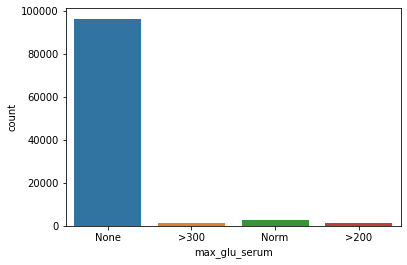

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64


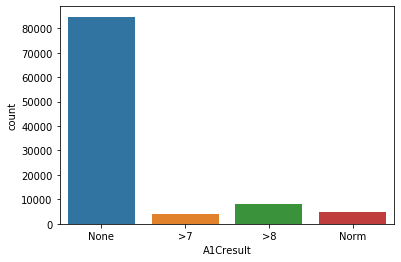

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64


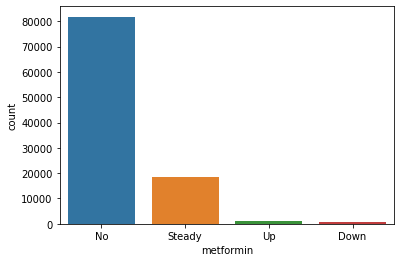

No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


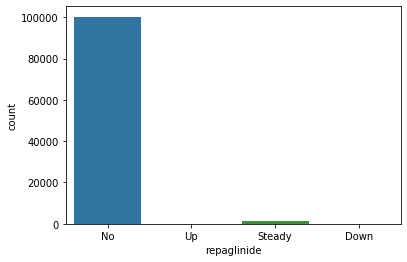

No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


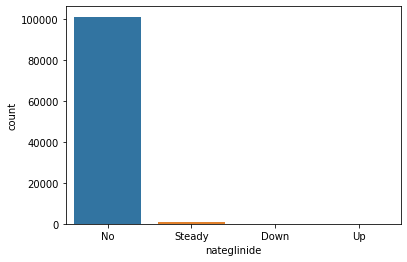

No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


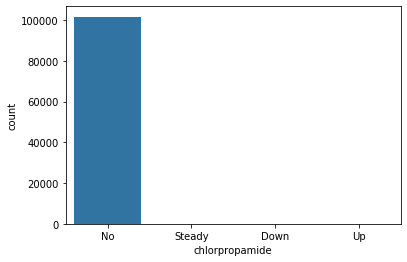

No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


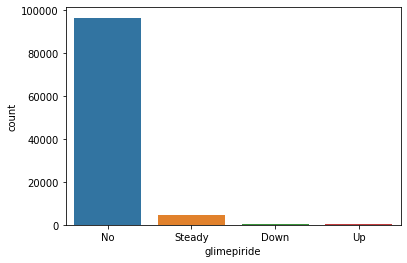

No        101765
Steady         1
Name: acetohexamide, dtype: int64


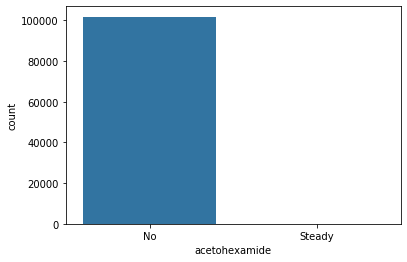

No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64


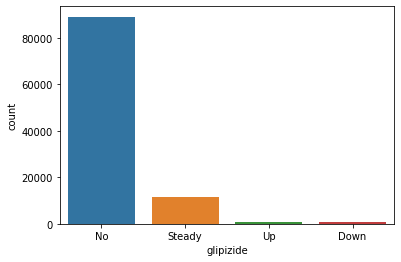

No        91116
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


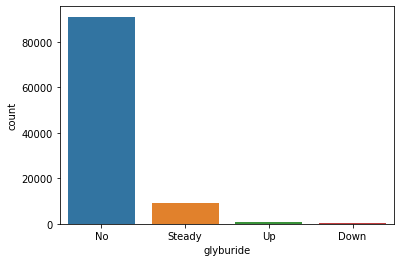

No        101743
Steady        23
Name: tolbutamide, dtype: int64


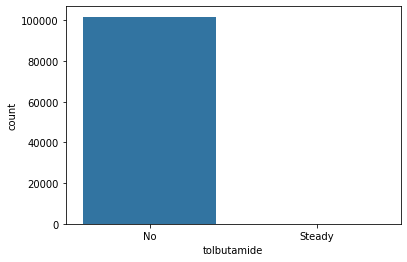

No        94438
Steady     6976
Up          234
Down        118
Name: pioglitazone, dtype: int64


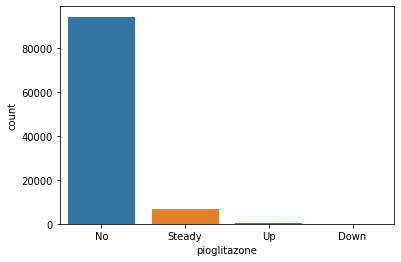

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64


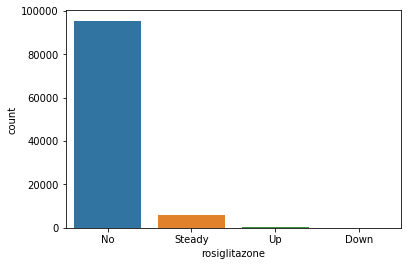

No        101458
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


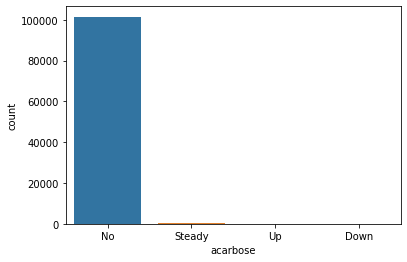

No        101728
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


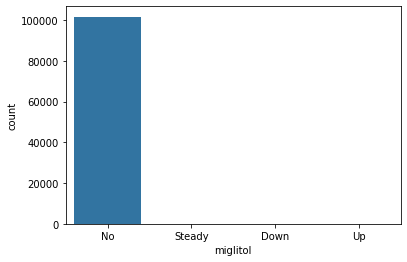

No        101763
Steady         3
Name: troglitazone, dtype: int64


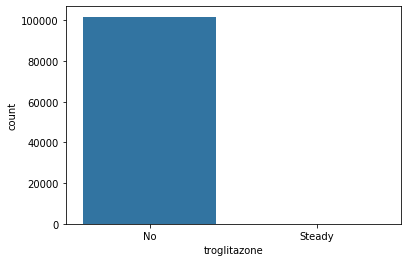

No        101727
Steady        38
Up             1
Name: tolazamide, dtype: int64


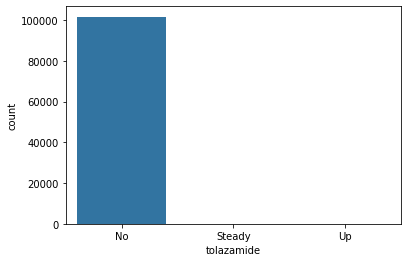

No    101766
Name: examide, dtype: int64


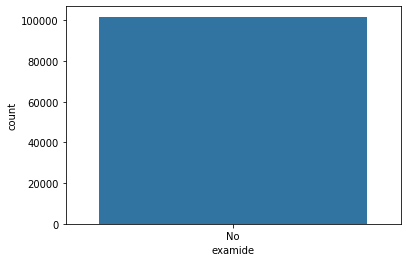

No    101766
Name: citoglipton, dtype: int64


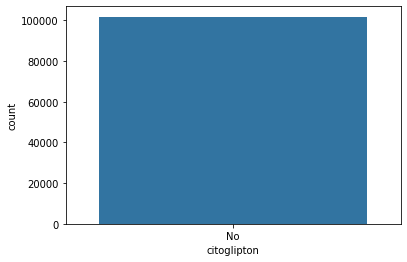

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


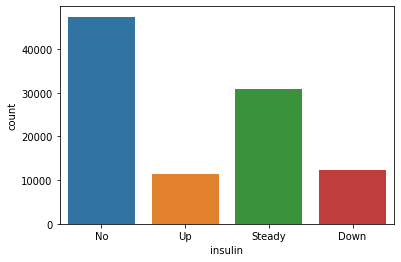

No        101060
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


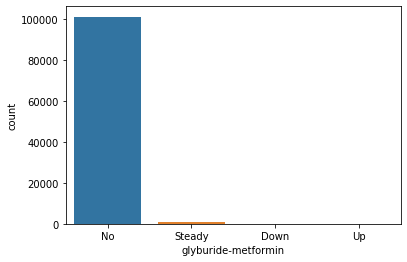

No        101753
Steady        13
Name: glipizide-metformin, dtype: int64


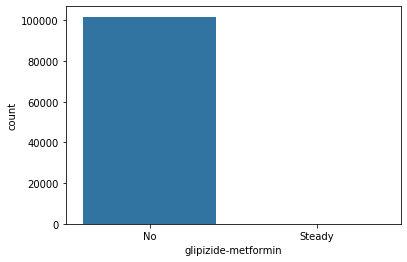

No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64


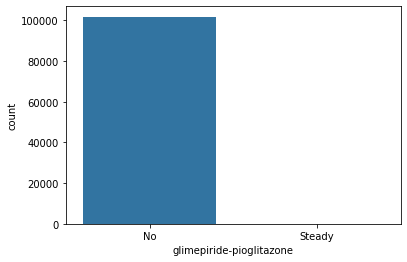

No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64


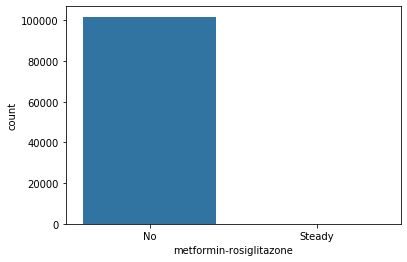

No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


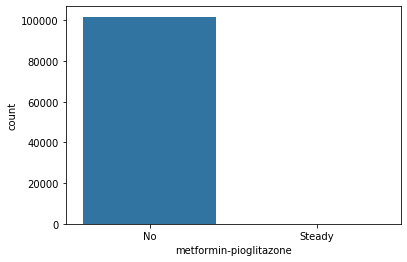

In [103]:
for i in data3.iloc[:,1:]:
    print(data3[i].value_counts())
    sns.countplot(data3[i])
    plt.show()

Examide and Citoglipton are Homogeneous in nature!

Insulin is the Highest prescribed drug with Steady Dosages!

No     54755
Yes    47011
Name: change, dtype: int64


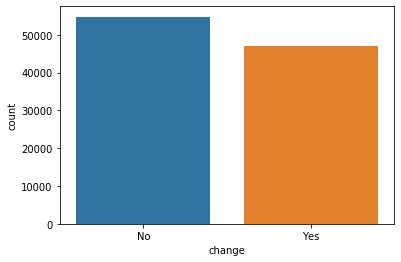

In [104]:
#change
print(data4.change.value_counts())
sns.countplot(data4.change)
plt.show()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64


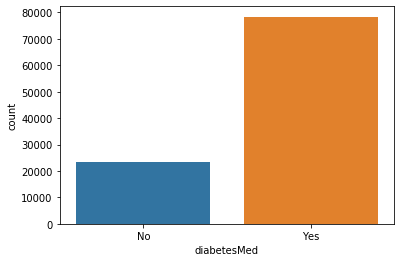

In [105]:
#diabetesMed
print(data4.diabetesMed.value_counts())
sns.countplot(data4.diabetesMed)
plt.show()

78% of patients have been prescribed Diabetic Meds!

### Lets look ath how these drugs are affecting the readmission

readmitted       <30    >30     NO
max_glu_serum                     
>200             185    530    770
>300             181    521    562
None           10696  33609  52115
Norm             295    885   1417


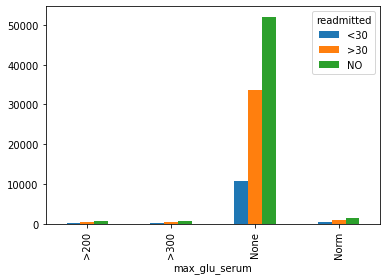

readmitted   <30    >30     NO
A1Cresult                     
>7           383   1300   2129
>8           811   2901   4504
None        9681  29745  45322
Norm         482   1599   2909


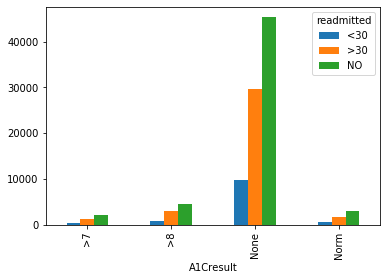

readmitted   <30    >30     NO
metformin                     
Down          69    190    316
No          9418  28839  43521
Steady      1782   6169  10395
Up            88    347    632


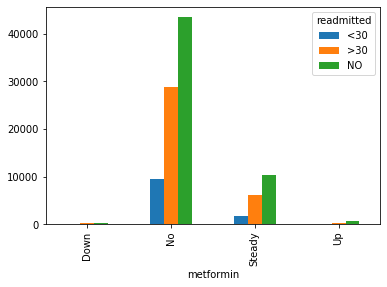

readmitted     <30    >30     NO
repaglinide                     
Down             3     19     23
No           11152  34905  54170
Steady         182    588    614
Up              20     33     57


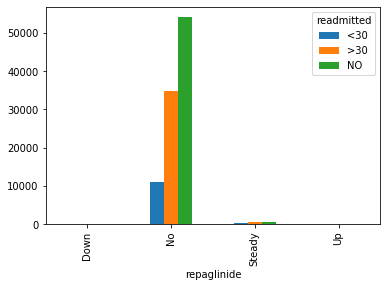

readmitted     <30    >30     NO
nateglinide                     
Down             1      4      6
No           11277  35283  54503
Steady          78    248    342
Up               1     10     13


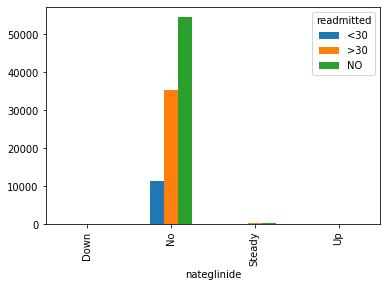

readmitted        <30    >30     NO
chlorpropamide                     
Down                0      0      1
No              11352  35511  54817
Steady              5     29     45
Up                  0      5      1


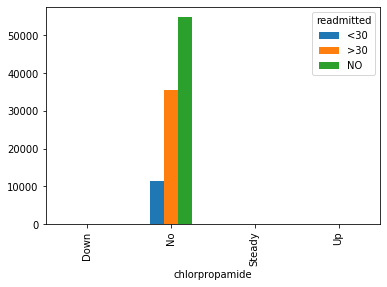

readmitted     <30    >30     NO
glimepiride                     
Down            25     68    101
No           10827  33638  52110
Steady         468   1737   2465
Up              37    102    188


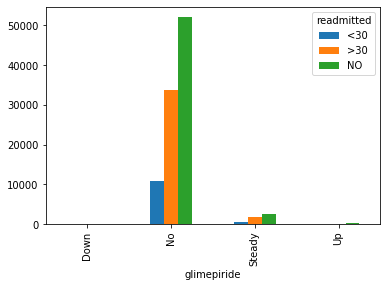

readmitted       <30    >30     NO
acetohexamide                     
No             11357  35544  54864
Steady             0      1      0


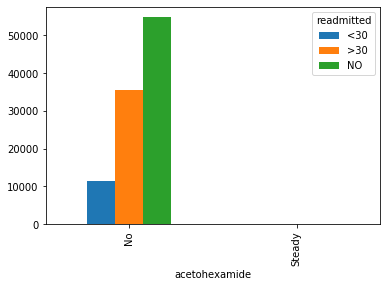

readmitted   <30    >30     NO
glipizide                     
Down          85    211    264
No          9905  30815  48360
Steady      1268   4233   5855
Up            99    286    385


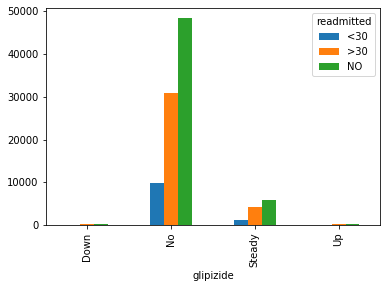

readmitted    <30    >30     NO
glyburide                      
Down           52    223    289
No          10225  31827  49064
Steady        995   3221   5058
Up             85    274    453


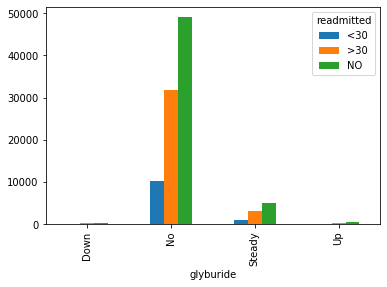

readmitted     <30    >30     NO
tolbutamide                     
No           11356  35538  54849
Steady           1      7     15


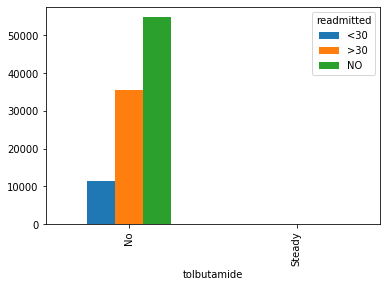

readmitted      <30    >30     NO
pioglitazone                     
Down             18     45     55
No            10583  32788  51067
Steady          727   2620   3629
Up               29     92    113


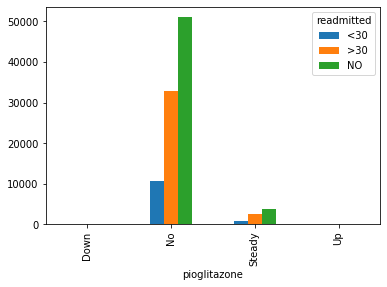

readmitted       <30    >30     NO
rosiglitazone                     
Down               5     22     60
No             10692  33136  51573
Steady           641   2335   3124
Up                19     52    107


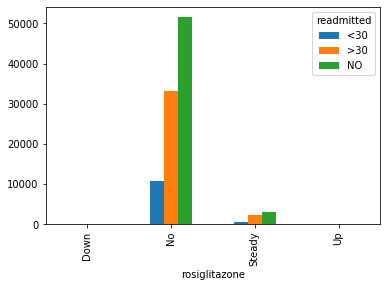

readmitted    <30    >30     NO
acarbose                       
Down            1      1      1
No          11329  35390  54739
Steady         25    150    120
Up              2      4      4


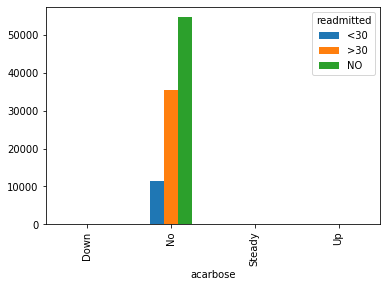

readmitted    <30    >30     NO
miglitol                       
Down            2      3      0
No          11353  35525  54850
Steady          2     16     13
Up              0      1      1


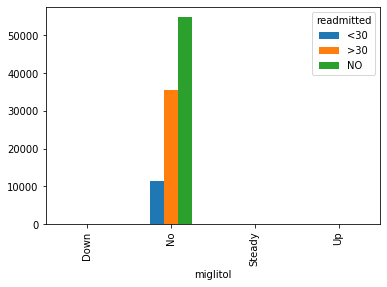

readmitted      <30    >30     NO
troglitazone                     
No            11357  35543  54863
Steady            0      2      1


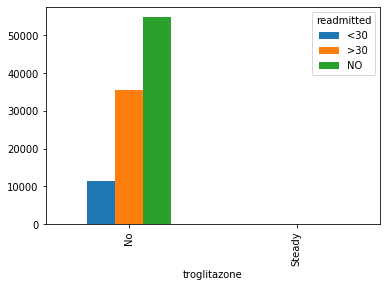

readmitted    <30    >30     NO
tolazamide                     
No          11354  35535  54838
Steady          3      9     26
Up              0      1      0


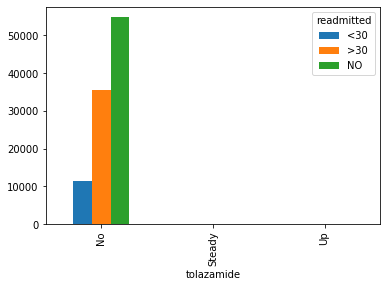

readmitted    <30    >30     NO
examide                        
No          11357  35545  54864


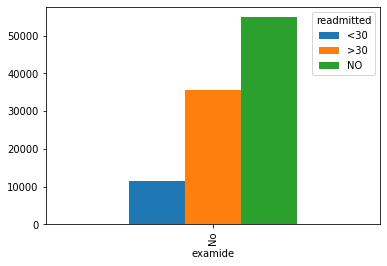

readmitted     <30    >30     NO
citoglipton                     
No           11357  35545  54864


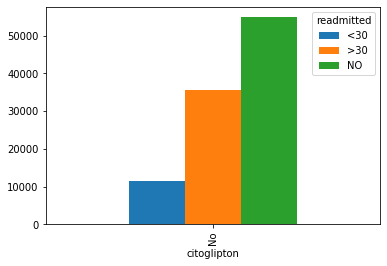

readmitted   <30    >30     NO
insulin                       
Down        1698   4752   5768
No          4756  15949  26678
Steady      3433  10482  16934
Up          1470   4362   5484


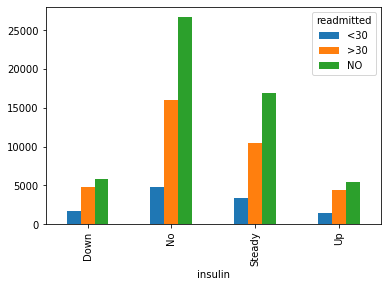

readmitted             <30    >30     NO
glyburide-metformin                     
Down                     1      0      5
No                   11279  35287  54494
Steady                  77    257    358
Up                       0      1      7


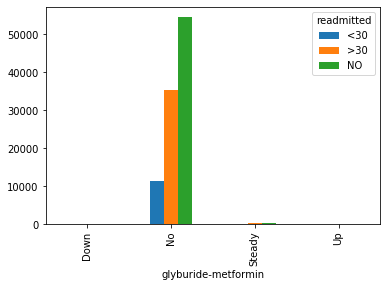

readmitted             <30    >30     NO
glipizide-metformin                     
No                   11356  35538  54859
Steady                   1      7      5


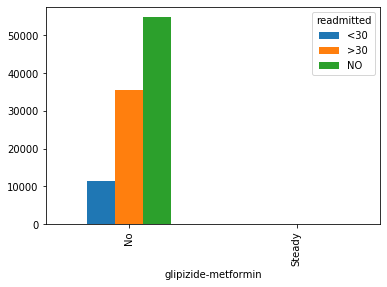

readmitted                  <30    >30     NO
glimepiride-pioglitazone                     
No                        11357  35544  54864
Steady                        0      1      0


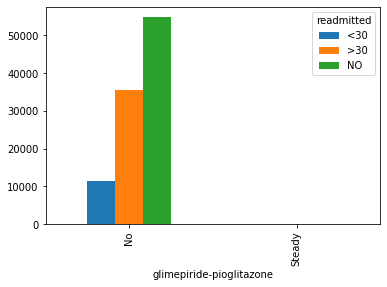

readmitted                 <30    >30     NO
metformin-rosiglitazone                     
No                       11357  35545  54862
Steady                       0      0      2


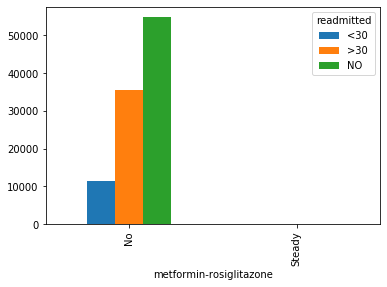

readmitted                <30    >30     NO
metformin-pioglitazone                     
No                      11357  35545  54863
Steady                      0      0      1


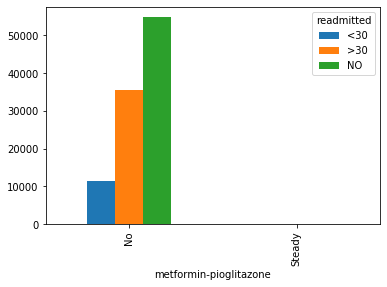

In [106]:
for i in data3.iloc[:,1:]:
    print(pd.crosstab(data3[i],data3.readmitted))
    pd.crosstab(data3[i],data3.readmitted).plot(kind='bar')
    plt.show()

readmitted   <30    >30     NO
change                        
No          5799  18273  30683
Yes         5558  17272  24181


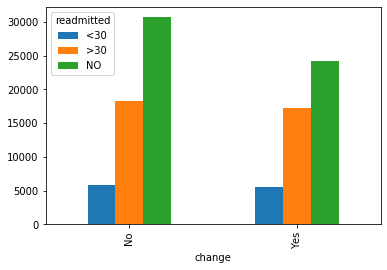

In [107]:
#change
print(pd.crosstab(data4.change,data4.readmitted))
pd.crosstab(data4.change,data4.readmitted).plot(kind='bar')
plt.show()

readmitted    <30    >30     NO
diabetesMed                    
No           2246   7227  13930
Yes          9111  28318  40934


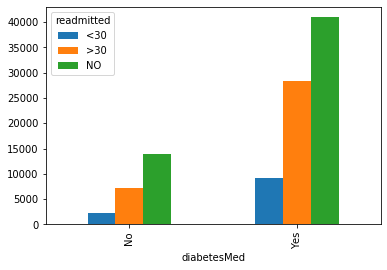

In [108]:
#diabetesMed
print(pd.crosstab(data4.diabetesMed,data4.readmitted))
pd.crosstab(data4.diabetesMed,data4.readmitted).plot(kind='bar')
plt.show()

Not much change in ratio between people who have been prescribed diabetic drugs and those who have not for readmission

# Data Preparation :

In [109]:
empty_list = []
def patient_number_occurence(X):
  empty_list.append(X)
  return empty_list.count(X)

patient_occurence_list = []
for i in data1.patient_nbr:
  patient_occurence_list.append(patient_number_occurence(i))
data1['patient_visits'] = patient_occurence_list

In [110]:
# Dropping the target from individual dataframes :
data1 = data1.drop('readmitted',axis=1)
data2 = data2.drop('readmitted',axis=1)
data3 = data3.drop('readmitted',axis=1)

In [111]:
# combining the Data for final DF 
final_data = pd.concat([data1,data2,data3,data4],axis=1)
final_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,patient_visits,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,0-10,NaN,5.0,7.0,1.0,1.0,1.0,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,Diabetic,Others,Others,specified complications,other complications,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,10-20,NaN,1.0,1.0,3.0,3.0,1.0,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,Neoplasm,Diabetic,Neoplasm,other complications,no complications,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,20-30,NaN,1.0,1.0,3.0,2.0,1.0,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,Others,Diabetic,Others,other complications,no complications,other complications,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,30-40,NaN,1.0,1.0,3.0,2.0,1.0,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,Neoplasm,Diabetic,Circulatory,other complications,renal manifestation,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,40-50,NaN,1.0,1.0,3.0,1.0,1.0,NaN,NaN,51,0,8,0,0,0,197,157,250,5,Neoplasm,Neoplasm,Diabetic,other complications,other complications,no complications,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes,NO


# **Null Values Handling:**

In [112]:
null_data = (final_data.isnull().sum()/final_data.shape[0]*100).sort_values(ascending=False)
null_data = pd.DataFrame(null_data).reset_index()
null_data.columns = ['Features','Missing_Percentage']
null_data = null_data[null_data.Missing_Percentage>0]
null_data

,Features,Missing_Percentage
0,weight,96.858479
1,medical_specialty,49.082208
2,payer_code,39.557416
3,diag_3,1.398306
4,diag_2,0.351787
5,discharge_disposition_id,0.002948
6,patient_visits,0.002948
7,admission_source_id,0.002948
8,encounter_id,0.002948
9,admission_type_id,0.002948


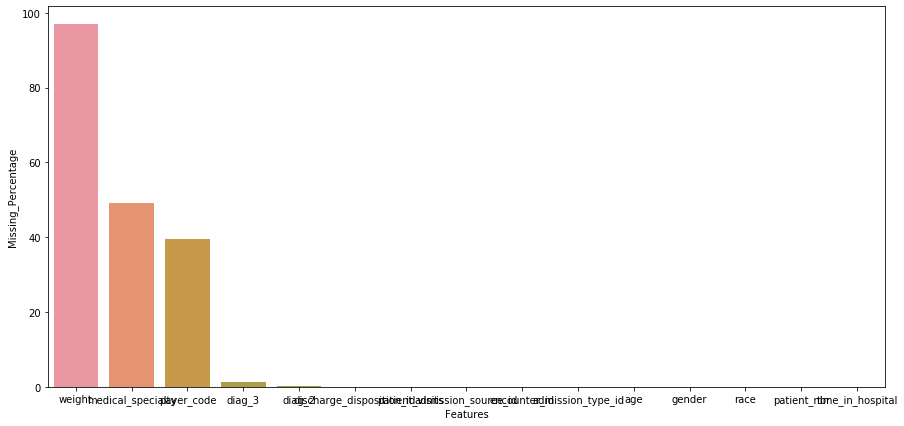

In [113]:
plt.figure(figsize=(15,7))
sns.barplot(null_data.Features,null_data.Missing_Percentage)
plt.show()

In [114]:
data2.payer_code.value_counts()
# will drop payer_code

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [115]:
data2.medical_specialty.value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Psychiatry-Addictive                    1
Neurophysiology                         1
Name: medical_specialty, Length: 72, dtype: int64

In [116]:
# No directrelation with the re-admission
# Heavy number of missing values 
# Heavy division of internal Categories as well
data2.medical_specialty.isnull().sum()/data2.shape[0]

0.49082208203132677

    ### Weight, Medical_Speciality and Payer Code have higher Missing Values and have no Correlation with the Target!
* Also there are High variety of Categories in Medical_Speciality and Payer_Code

Thus, will be dropping these columns

In [117]:
final_data.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)

    # There are only 2% Missing Values in Race Column, we could drop these null values as well as these wouldn't affect my 
    model that much!

In [118]:
final_data = final_data[~final_data.race.isnull()]

In [119]:
# Dropping the columns diag1,diag2 and diag3 as we have extracted the maximum possible information we can 
# As these were the ICD9 Codes related to the Hospital Diagnosis 
final_data.drop(['diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [120]:
# We will also drop Patient_nbr as we have manufactured a new Feature based on the Patient Number about the visits including the current visit
final_data.drop(['patient_nbr'],axis=1,inplace=True)

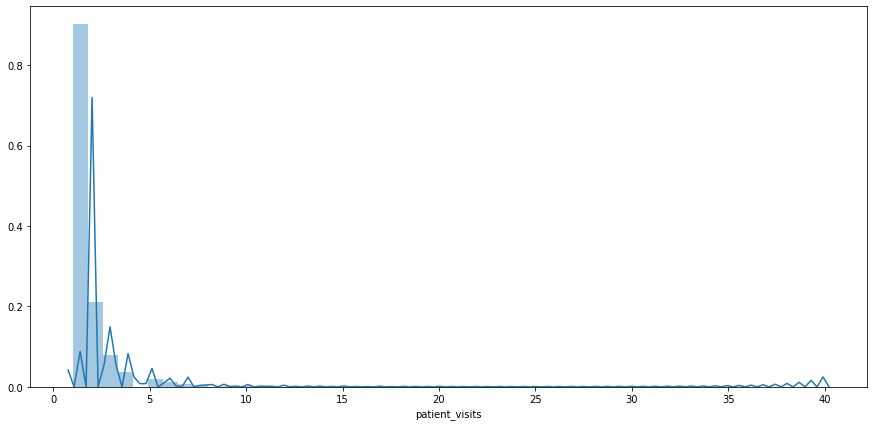

In [121]:
# Distribution of Patient Visits
plt.figure(figsize=(15,7))
sns.distplot(final_data.patient_visits);

In [122]:
# Dropping Encounter ID as its a simple id and unique for different records and not contibuting any information!
final_data.drop('encounter_id',axis=1,inplace=True)

In [123]:
final_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,patient_visits,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,0-10,5.0,7.0,1.0,1.0,1.0,41,0,1,0,0,0,1,Diabetic,Others,Others,specified complications,other complications,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,10-20,1.0,1.0,3.0,3.0,1.0,59,0,18,0,0,0,9,Neoplasm,Diabetic,Neoplasm,other complications,no complications,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,20-30,1.0,1.0,3.0,2.0,1.0,11,5,13,2,0,1,6,Others,Diabetic,Others,other complications,no complications,other complications,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,30-40,1.0,1.0,3.0,2.0,1.0,44,1,16,0,0,0,7,Neoplasm,Diabetic,Circulatory,other complications,renal manifestation,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,NO
4,Caucasian,Male,40-50,1.0,1.0,3.0,1.0,1.0,51,0,8,0,0,0,5,Neoplasm,Neoplasm,Diabetic,other complications,other complications,no complications,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes,NO


### Checking for Multi Collinearity:

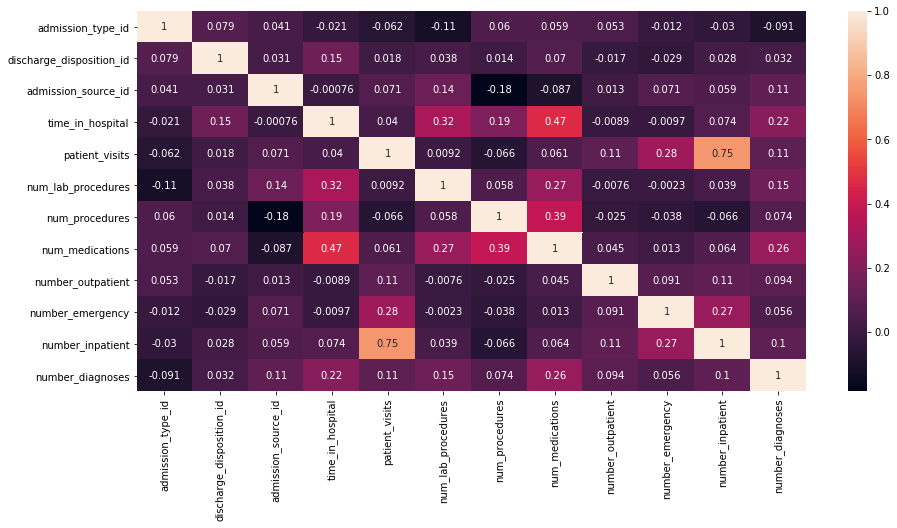

In [124]:
plt.figure(figsize=(15,7))
sns.heatmap(final_data.corr(),annot=True)
plt.show()

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

mylist = []
for i in range(final_data.select_dtypes(np.number).shape[1]):
    mylist.append(variance_inflation_factor(final_data.select_dtypes(np.number).values,i))

vif_df = pd.DataFrame({'Features' : final_data.select_dtypes(np.number).columns, 'VIF' : mylist}).sort_values('VIF',ascending=False)
vif_df

,Features,VIF
11,number_diagnoses,11.399133
7,num_medications,7.582395
2,admission_source_id,6.648199
5,num_lab_procedures,6.469417
4,patient_visits,4.791375
3,time_in_hospital,4.405462
10,number_inpatient,2.834942
0,admission_type_id,2.619494
1,discharge_disposition_id,2.537973
6,num_procedures,1.962966


    # We can see that there is Multicollinearity in our Data!
* Will handle this in the next iteration post building our Base Model along with Feature Selection!

In [126]:
# Enconding the target variable :
final_data_interim_pre_encode = final_data.copy()
final_data['readmitted'] = final_data['readmitted'].map({'NO':0,'>30':1,'<30':2})


In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in final_data.select_dtypes('object'):
    final_data[i] = le.fit_transform(final_data[i])

In [128]:
# Label Encoding the Other Variables as well :
final_data['race'] = le.fit_transform(final_data['race'])
final_data['age'] = le.fit_transform(final_data['age'])
final_data['diag1_kind'] = le.fit_transform(final_data['diag1_kind'])
final_data['diag2_kind'] = le.fit_transform(final_data['diag2_kind'])
final_data['diag3_kind'] = le.fit_transform(final_data['diag3_kind'])
final_data['diag1_complications'] = le.fit_transform(final_data['diag1_complications'])
final_data['diag2_complications'] = le.fit_transform(final_data['diag2_complications'])
final_data['diag3_complications'] = le.fit_transform(final_data['diag3_complications'])
final_data['change'] = le.fit_transform(final_data['change'])
final_data['diabetesMed'] = le.fit_transform(final_data['diabetesMed'])
final_data['gender'] = le.fit_transform(final_data['gender'])

In [129]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101763 entries, 0 to 101765
Data columns (total 49 columns):
race                        101763 non-null int64
gender                      101763 non-null int64
age                         101763 non-null int64
admission_type_id           101763 non-null float64
discharge_disposition_id    101763 non-null float64
admission_source_id         101763 non-null float64
time_in_hospital            101763 non-null float64
patient_visits              101763 non-null float64
num_lab_procedures          101763 non-null int64
num_procedures              101763 non-null int64
num_medications             101763 non-null int64
number_outpatient           101763 non-null int64
number_emergency            101763 non-null int64
number_inpatient            101763 non-null int64
number_diagnoses            101763 non-null int64
diag1_kind                  101763 non-null int64
diag2_kind                  101763 non-null int64
diag3_kind                  1

# Outlier Handling

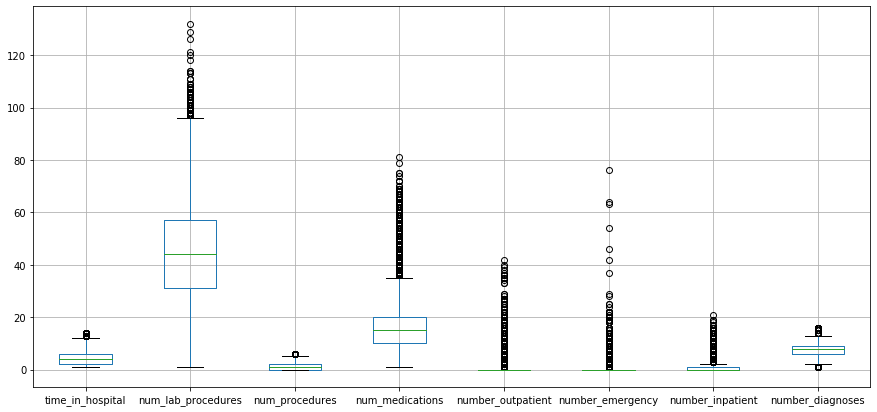

In [130]:
data.drop(['encounter_id','patient_nbr','admission_type_id','admission_source_id','discharge_disposition_id'],axis=1).boxplot(figsize=(15,7))
plt.xticks(rotation=0)
plt.show()

We haven't handled the Outliers as these outliers aare the main people who are affeccting my Target, like people with more number of inpatient records are getting readmitted!

People who have gone through more lab procedures are less likely to get readmitted!

Thus we have not Handled these Outliers!

# Base Model Building

In [131]:
from sklearn.model_selection import train_test_split

X = final_data.drop('readmitted',axis=1)
y = final_data.readmitted

In [132]:
# We will split the data into 70:30 split.
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=10)
print("Xtrain :",Xtrain.shape)
print("Xtest :",Xtest.shape)
print("ytrain :",ytrain.shape)
print("ytest :",ytest.shape)

Xtrain : (71234, 48)
Xtest : (30529, 48)
ytrain : (71234,)
ytest : (30529,)


### Decision Tree Model :

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree = decision_tree.fit(Xtrain,ytrain)

ypred = decision_tree.predict(Xtest)

print('Classification Report :\n',metrics.classification_report(ytest,ypred))

Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.58      0.59     16542
           1       0.39      0.40      0.40     10585
           2       0.15      0.16      0.15      3402

    accuracy                           0.47     30529
   macro avg       0.38      0.38      0.38     30529
weighted avg       0.48      0.47      0.47     30529



### Random Forest Model :

In [134]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=10)

rf_model.fit(Xtrain,ytrain)

ypred = rf_model.predict(Xtest)

print('Classification Report :')
print(metrics.classification_report(ytest,ypred))

Classification Report :
              precision    recall  f1-score   support

           0       0.62      0.83      0.71     16542
           1       0.49      0.37      0.42     10585
           2       0.43      0.02      0.03      3402

    accuracy                           0.58     30529
   macro avg       0.51      0.41      0.39     30529
weighted avg       0.55      0.58      0.53     30529



##### We can see that the Accuracy and F1 Score is better in Random Forest Model amongst base models built!

------------------------------------

# Improving Model

----------------------------

In [135]:
final_data_interim_pre_encode.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,patient_visits,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,0-10,5.0,7.0,1.0,1.0,1.0,41,0,1,0,0,0,1,Diabetic,Others,Others,specified complications,other complications,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,10-20,1.0,1.0,3.0,3.0,1.0,59,0,18,0,0,0,9,Neoplasm,Diabetic,Neoplasm,other complications,no complications,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,>30
2,AfricanAmerican,Female,20-30,1.0,1.0,3.0,2.0,1.0,11,5,13,2,0,1,6,Others,Diabetic,Others,other complications,no complications,other complications,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,30-40,1.0,1.0,3.0,2.0,1.0,44,1,16,0,0,0,7,Neoplasm,Diabetic,Circulatory,other complications,renal manifestation,other complications,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Yes,Yes,NO
4,Caucasian,Male,40-50,1.0,1.0,3.0,1.0,1.0,51,0,8,0,0,0,5,Neoplasm,Neoplasm,Diabetic,other complications,other complications,no complications,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes,Yes,NO


#### Lets Try Converting the Multiclass to Binary Class and look at the distribution!

In [136]:
# New Mapping
# NO --> NO --> Not Readmitted
# >30 --> YES --> Readmitted
# <30 --> YES --> Readmitted

final_data_interim_pre_encode['readmitted'] = final_data_interim_pre_encode['readmitted'].map({'NO':'NO','>30':'YES','<30':'YES'})

In [137]:
final_data_interim_pre_encode.std()[final_data_interim_pre_encode.std() == 0]

Series([], dtype: float64)

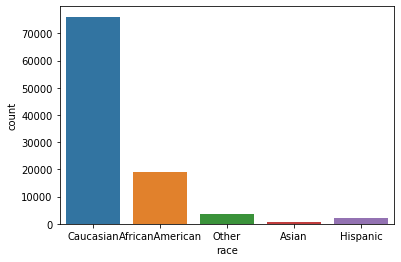

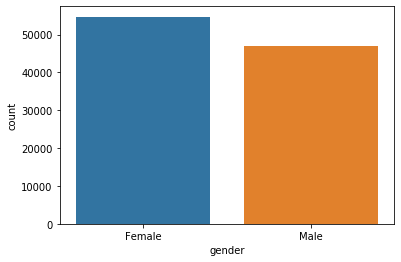

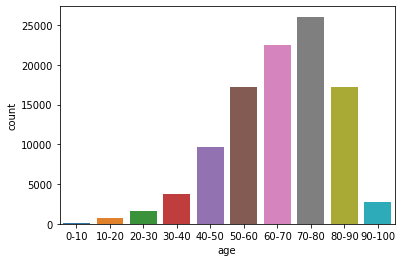

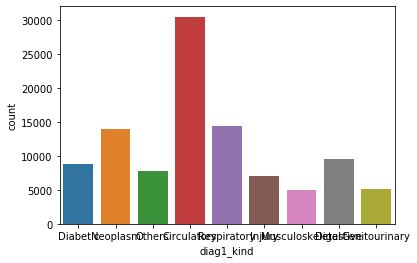

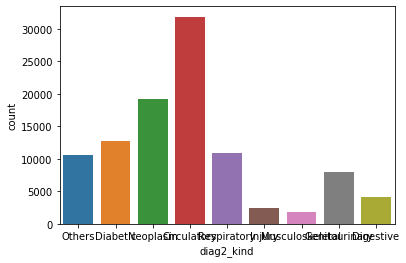

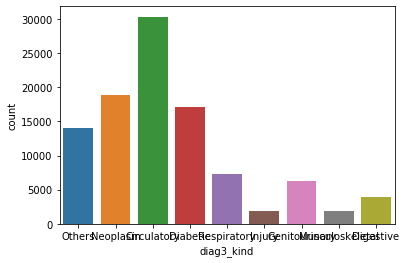

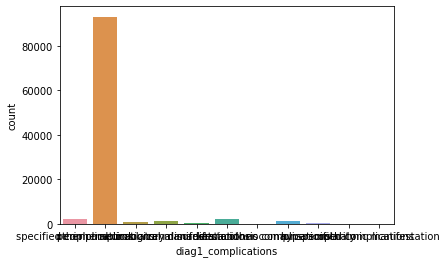

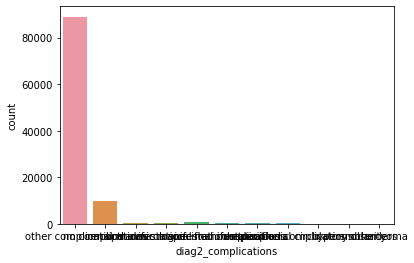

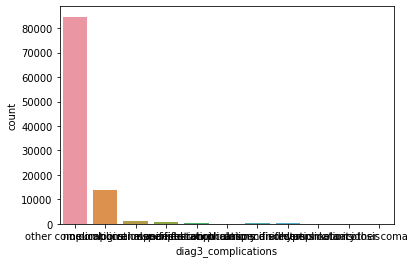

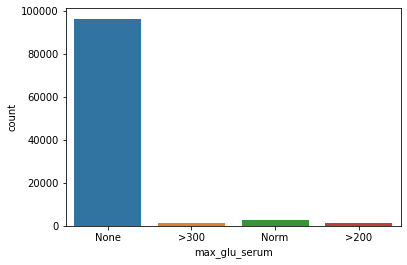

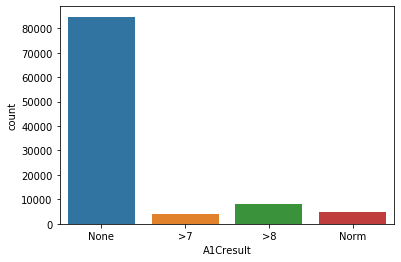

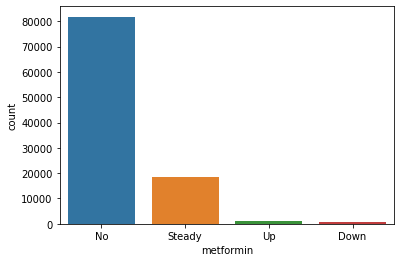

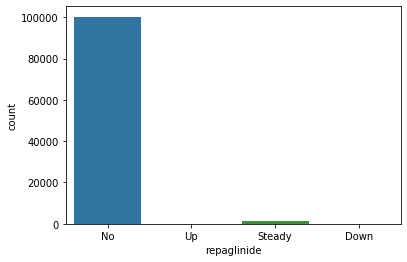

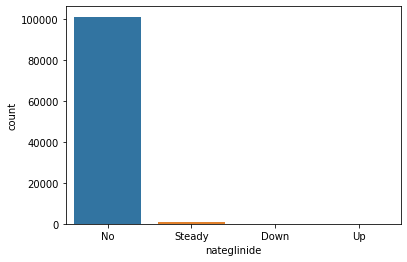

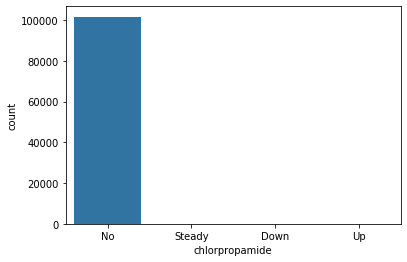

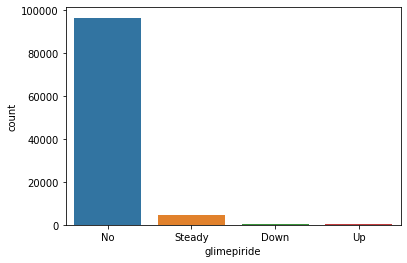

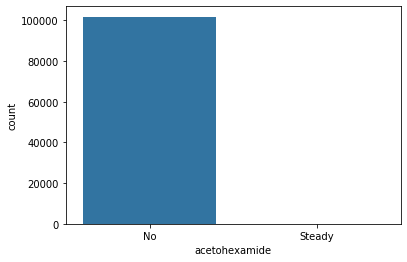

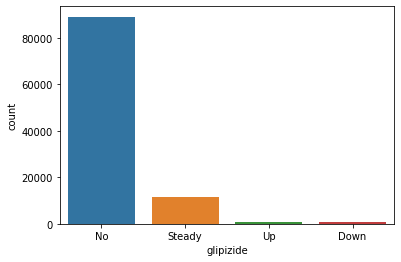

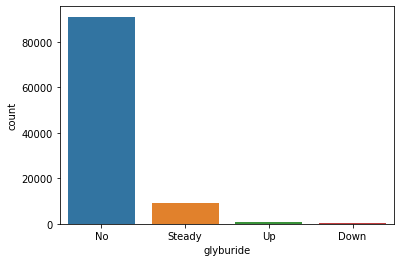

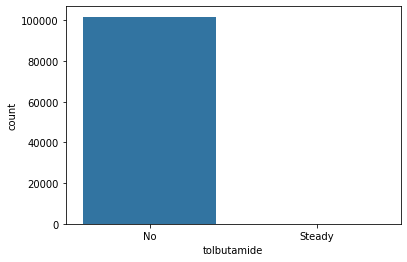

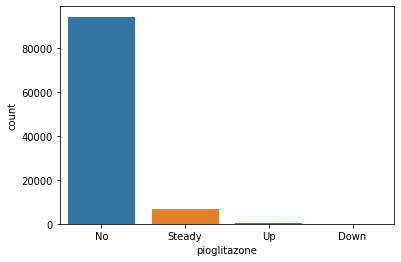

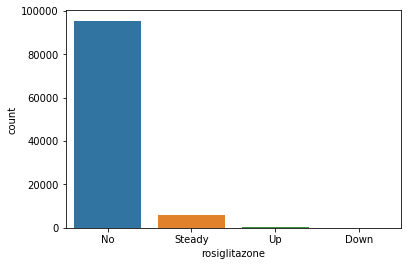

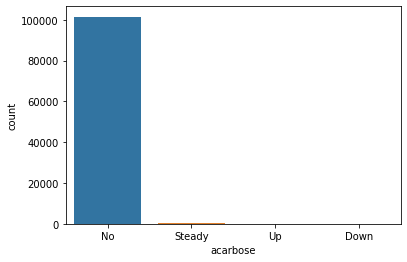

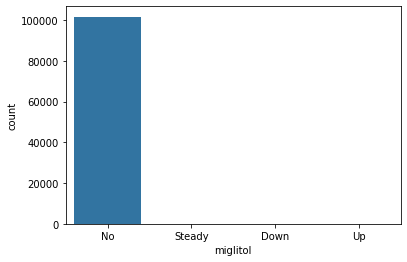

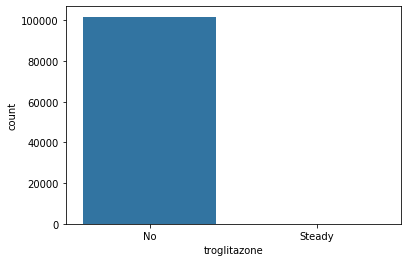

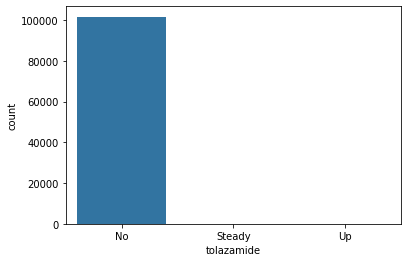

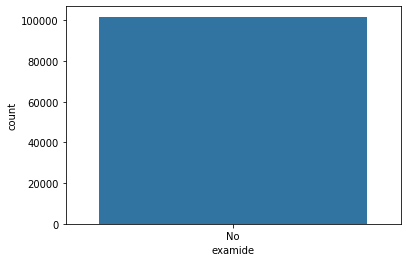

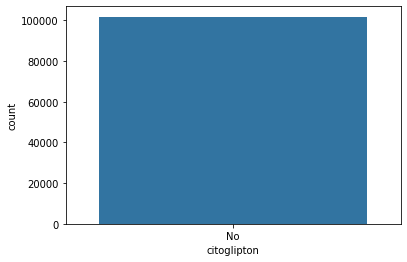

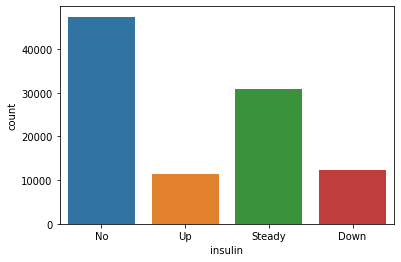

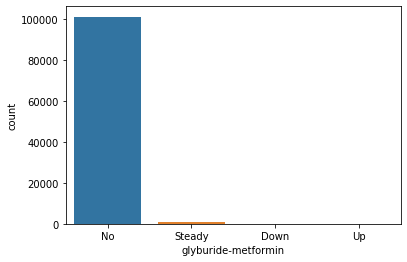

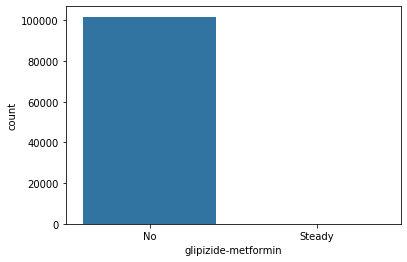

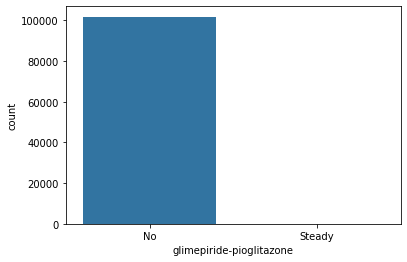

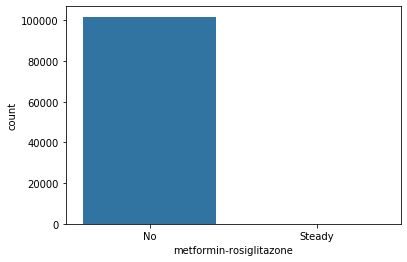

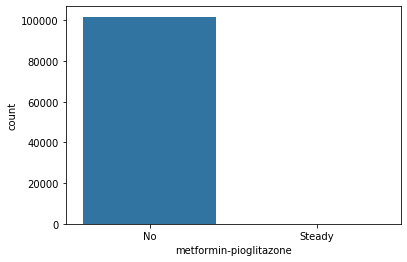

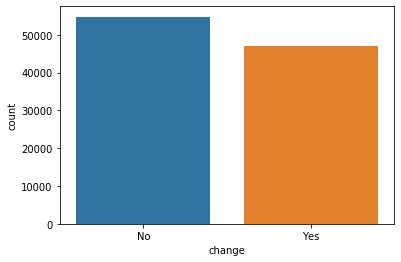

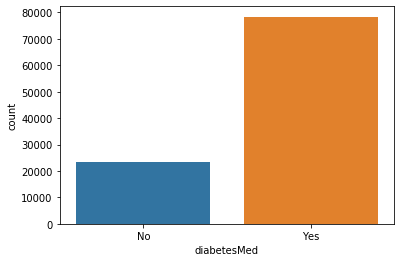

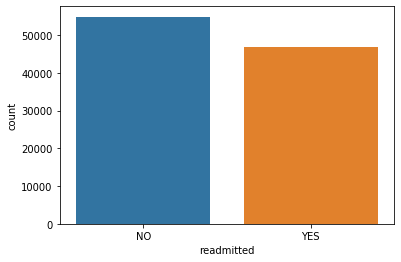

In [138]:
for i in final_data_interim_pre_encode.select_dtypes(np.object).columns:
    sns.countplot(final_data_interim_pre_encode[i])
    plt.show()

In [139]:
# Will be removing these Columns due to Homogeneity!
final_data_interim_pre_encode.drop(['examide','citoglipton'],axis=1,inplace=True)

## Lets Check the effect of Diagnosis Kinds and Complications on Readmission

    # Diagnosis Kind v/s Readmission

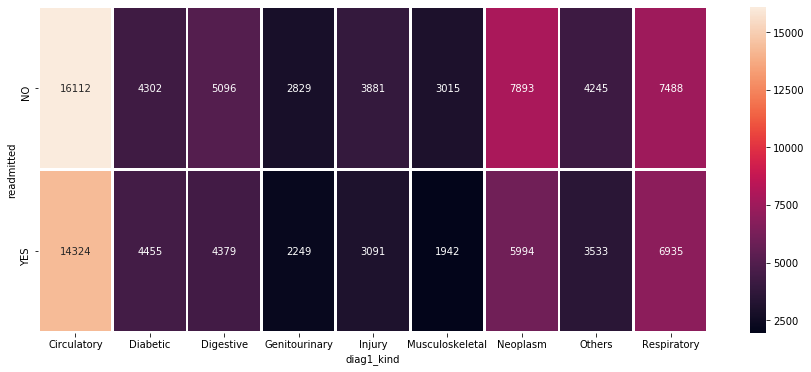

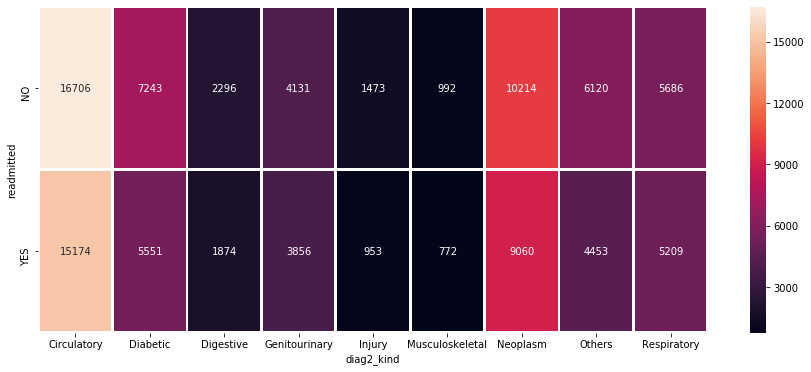

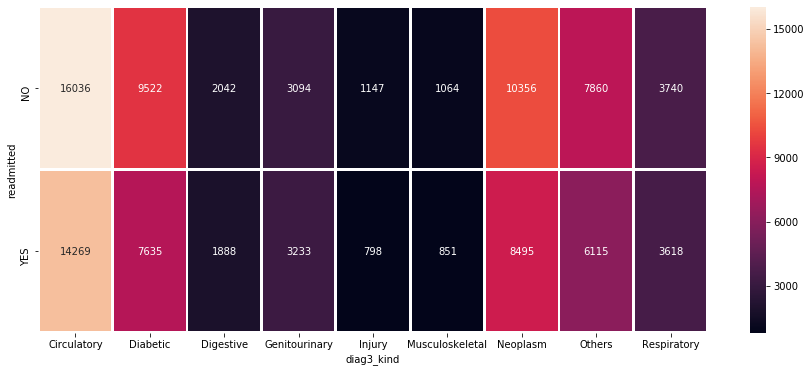

In [140]:
for i in (['diag1_kind','diag2_kind','diag3_kind']):
    ct = pd.crosstab(final_data_interim_pre_encode.readmitted,final_data_interim_pre_encode[i])
    plt.figure(figsize=(15,6))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.show()
    print()

Previous inference is valid even here!

    # Diagnosis Complications v/s Readmission

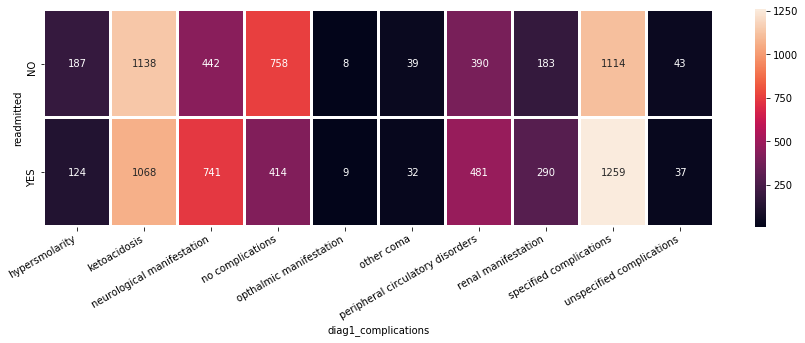

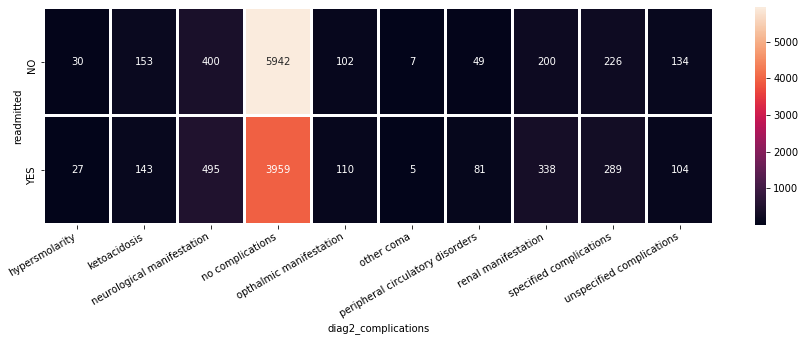

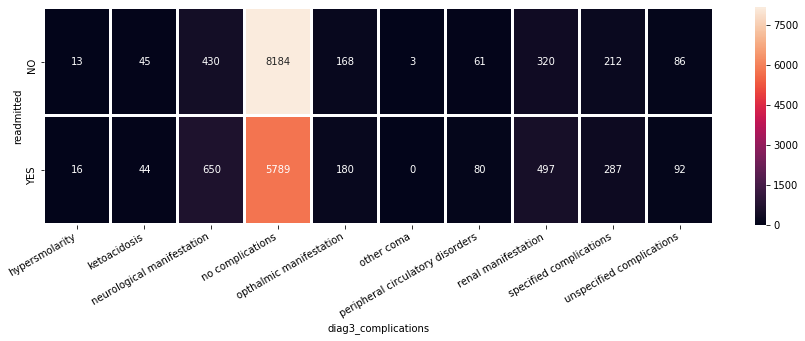

In [206]:
for i in (['diag1_complications','diag2_complications','diag3_complications']):
    ct = pd.crosstab(final_data_interim_pre_encode[final_data_interim_pre_encode[i]!='other complications']['readmitted'],final_data_interim_pre_encode[final_data_interim_pre_encode[i]!='other complications'][i])
    plt.figure(figsize=(15,4))
    sns.heatmap(ct,annot=True,fmt='d',lw=2)
    plt.xticks(rotation = 30,ha = 'right')
    plt.show()
    print()

In [142]:
final_data_interim_pre_encode.dtypes

race                         object
gender                       object
age                          object
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
patient_visits              float64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
number_diagnoses              int64
diag1_kind                   object
diag2_kind                   object
diag3_kind                   object
diag1_complications          object
diag2_complications          object
diag3_complications          object
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                 

In [143]:
final_data_interim_pre_encode.select_dtypes(np.number)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,patient_visits,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,5.0,7.0,1.0,1.0,1.0,41,0,1,0,0,0,1
1,1.0,1.0,3.0,3.0,1.0,59,0,18,0,0,0,9
2,1.0,1.0,3.0,2.0,1.0,11,5,13,2,0,1,6
3,1.0,1.0,3.0,2.0,1.0,44,1,16,0,0,0,7
4,1.0,1.0,3.0,1.0,1.0,51,0,8,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1.0,2.0,3.0,3.0,2.0,51,0,16,0,0,0,9
101762,1.0,2.0,2.0,5.0,2.0,33,3,18,0,0,1,9
101763,1.0,1.0,3.0,1.0,3.0,53,0,9,1,0,0,13
101764,1.0,2.0,3.0,10.0,4.0,45,2,21,0,0,1,9


In [144]:
# converting admission_type_id/admission_source_id/discharge_disposition_id to object 
# as we need to apply anova on them to see their effect on Target!
final_data_interim_pre_encode.admission_source_id = final_data_interim_pre_encode.admission_source_id.astype('object')
final_data_interim_pre_encode.admission_type_id = final_data_interim_pre_encode.admission_type_id.astype('object')
final_data_interim_pre_encode.discharge_disposition_id = final_data_interim_pre_encode.discharge_disposition_id.astype('object')

# Check Linearity for Application of PCA

* Numerical Data should follow Linearity

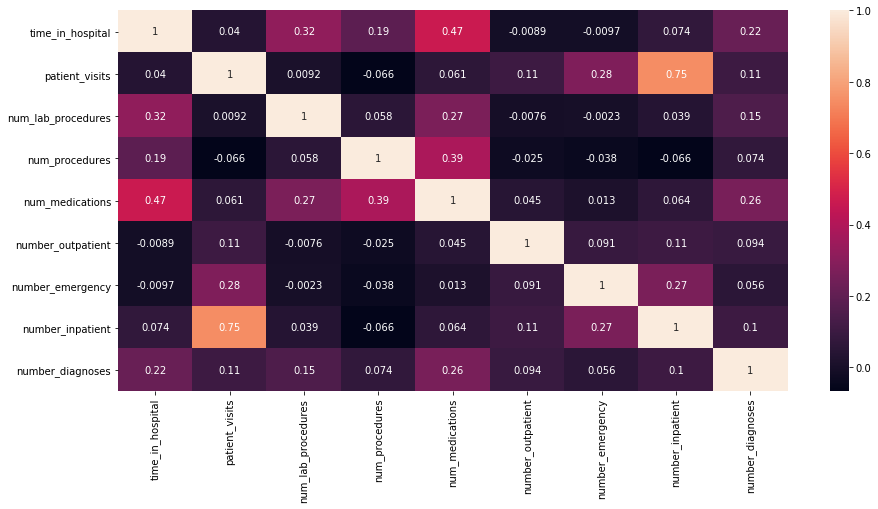

In [197]:
plt.figure(figsize=(15,7))
sns.heatmap(final_data_interim_pre_encode.corr(),annot=True)
plt.show()

    There is a not high level of Multicollinearity here, there isn't any need to apply Dimensionality Reduction Technique,
    we could proceed using Feature Selection Methods!

## Base Model for Binary Classification

In [188]:
final_data_interim_pre_encode.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
patient_visits              float64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
number_diagnoses              int64
diag1_kind                   object
diag2_kind                   object
diag3_kind                   object
diag1_complications          object
diag2_complications          object
diag3_complications          object
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                 

In [190]:
df_base = final_data_interim_pre_encode.copy()

df_base['admission_type_id'] = df_base['admission_type_id'].astype('int')
df_base['admission_source_id'] = df_base['admission_source_id'].astype('int')
df_base['discharge_disposition_id'] = df_base['discharge_disposition_id'].astype('int')

# Label Encoding for Categorical_Columns:
for i in df_base.select_dtypes('object').columns:
    le = LabelEncoder()
    df_base[i] = le.fit_transform(df_base[i])
    
df_base

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,patient_visits,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,5,7,1,1.0,1.0,41,0,1,0,0,0,1,1,7,7,9,6,6,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0
1,2,0,1,1,1,3,3.0,1.0,59,0,18,0,0,0,9,6,1,6,6,3,6,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,1,1,1
2,0,0,2,1,1,3,2.0,1.0,11,5,13,2,0,1,6,7,1,7,6,3,6,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0
3,2,1,3,1,1,3,2.0,1.0,44,1,16,0,0,0,7,6,1,0,6,8,6,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,1,1,0
4,2,1,4,1,1,3,1.0,1.0,51,0,8,0,0,0,5,6,6,1,6,6,3,2,2,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,2,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,1,2,3,3.0,2.0,51,0,16,0,0,0,9,1,6,0,1,6,6,2,1,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1
101762,0,0,8,1,2,2,5.0,2.0,33,3,18,0,0,1,9,2,6,2,6,6,6,2,2,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,2,1,0,0,0,0,0,1,0
101763,2,1,7,1,1,3,1.0,3.0,53,0,9,1,0,0,13,6,3,6,6,6,6,2,2,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0
101764,2,0,8,1,2,3,10.0,4.0,45,2,21,0,0,1,9,4,7,4,6,6,6,2,2,1,1,1,1,1,0,2,1,0,2,1,1,1,0,0,3,1,0,0,0,0,1,1,0


In [191]:
X = df_base.drop('readmitted',axis=1)
y = df_base.readmitted

# We will split the data into 70:30 split.
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,stratify = y,test_size=0.3,random_state=10)

#### Decission Tree Base Model

In [192]:
decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree_basemodel = decision_tree.fit(Xtrain,ytrain)

dt_basepred = decision_tree_basemodel.predict(Xtest)

print('Classification Report :\n',metrics.classification_report(ytest,dt_basepred))

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.58      0.59     16458
           1       0.52      0.53      0.53     14071

    accuracy                           0.56     30529
   macro avg       0.56      0.56      0.56     30529
weighted avg       0.56      0.56      0.56     30529



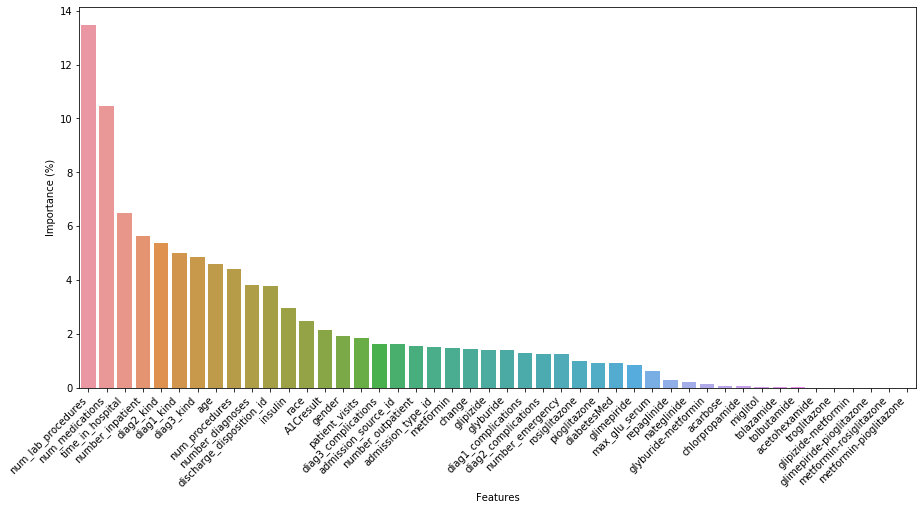

In [194]:
feat_importance = pd.DataFrame(decision_tree_basemodel.feature_importances_*100,Xtrain.columns).sort_values(0,ascending=False).reset_index()
feat_importance.columns = ['Features','Importance (%)']

plt.figure(figsize=(15,7))
sns.barplot(feat_importance.Features,feat_importance['Importance (%)'])
plt.xticks(rotation=45,ha='right');

#### Random Forest Base Model

In [193]:
rf_basemodel = RandomForestClassifier(n_estimators=100,random_state=10)

rf_basemodel.fit(Xtrain,ytrain)

rf_basepred = rf_basemodel.predict(Xtest)

print('Classification Report :')
print(metrics.classification_report(ytest,rf_basepred))

Classification Report :
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     16458
           1       0.62      0.54      0.58     14071

    accuracy                           0.64     30529
   macro avg       0.63      0.63      0.63     30529
weighted avg       0.63      0.64      0.63     30529



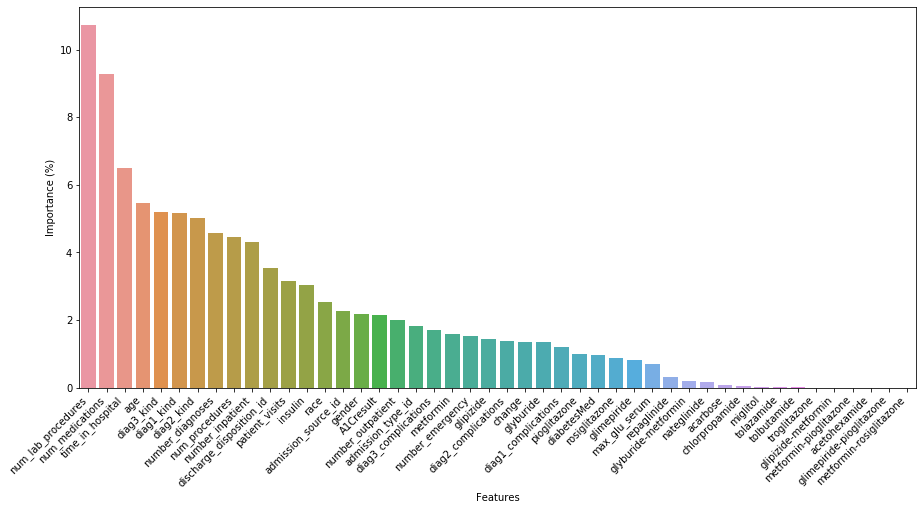

In [195]:
feat_importance = pd.DataFrame(rf_basemodel.feature_importances_*100,Xtrain.columns).sort_values(0,ascending=False).reset_index()
feat_importance.columns = ['Features','Importance (%)']

plt.figure(figsize=(15,7))
sns.barplot(feat_importance.Features,feat_importance['Importance (%)'])
plt.xticks(rotation=45,ha='right');

## Performing Statistical Test to check the Individual Feature Effects on Target

### T-Test on Numerical & ANOVA Columns on Categorical and adding to Feature_list not affect my target!

In [147]:
# H0 : Feature has NO Effect on Target
# H1 : Feature has a Clear Effect on Target

def statistical_test(df,target):
    cat_cols = df.select_dtypes('object').columns
    num_cols = df.select_dtypes(np.number).columns

    feature_list = []

    for i in num_cols: 
        g1 = df[df[target]=='NO'][i]
        g2 = df[df[target]=='YES'][i]
        ts,pv = stats.ttest_ind(g1,g2)
        if(pv<0.05):
            feature_list.append(i)
            print('{} :--> p_value::{} is Affecting Readmission'.format(i,pv))
        else:
            print('{} is NOT Affecting Readmission'.format(i))

    for j in cat_cols: #Excluding Target for analysis
        table = pd.crosstab(df[j],df[target])
        ts,pv,dfreedom,exp = stats.chi2_contingency(table)
        if (pv<0.05):
            feature_list.append(j)
            print('{} :--> p_value::{} has a Clear Effect on {}'.format(j,pv,target))
        else:
            print('{} is Not Affecting {}'.format(j,target))

    return feature_list

# Function Built for Statistical Test!

In [148]:
Important_Feature_List = statistical_test(final_data_interim_pre_encode,'readmitted') #df,target to be passed
Important_Feature_List

time_in_hospital :--> p_value::3.1662864432201493e-60 is Affecting Readmission
patient_visits :--> p_value::0.0 is Affecting Readmission
num_lab_procedures :--> p_value::5.5924941824722196e-36 is Affecting Readmission
num_procedures :--> p_value::3.114187424568916e-46 is Affecting Readmission
num_medications :--> p_value::2.1297757430676368e-50 is Affecting Readmission
number_outpatient :--> p_value::8.093160923167077e-152 is Affecting Readmission
number_emergency :--> p_value::4.7397216719607536e-238 is Affecting Readmission
number_inpatient :--> p_value::0.0 is Affecting Readmission
number_diagnoses :--> p_value::4.4702201664678114e-284 is Affecting Readmission
race :--> p_value::1.108709832012988e-54 has a Clear Effect on readmitted
gender :--> p_value::9.600737011575021e-09 has a Clear Effect on readmitted
age :--> p_value::4.724492728204115e-48 has a Clear Effect on readmitted
admission_type_id :--> p_value::1.672381063141189e-63 has a Clear Effect on readmitted
discharge_disposit

['time_in_hospital',
 'patient_visits',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'diag1_kind',
 'diag2_kind',
 'diag3_kind',
 'diag1_complications',
 'diag2_complications',
 'diag3_complications',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'glipizide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [149]:
print('Final Features which are affecting my target are :',len(Important_Feature_List)-1) #Target is Always here
# Features reduced from 47 to 32

Final Features which are affecting my target are : 32


In [150]:
feature_selection_df_v1 = final_data_interim_pre_encode[Important_Feature_List]
feature_selection_df_v1

,time_in_hospital,patient_visits,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,1.0,1.0,41,0,1,0,0,0,1,Caucasian,Female,0-10,5,7,1,Diabetic,Others,Others,specified complications,other complications,other complications,None,None,No,No,No,No,No,No,No,No,No,NO
1,3.0,1.0,59,0,18,0,0,0,9,Caucasian,Female,10-20,1,1,3,Neoplasm,Diabetic,Neoplasm,other complications,no complications,other complications,None,None,No,No,No,No,No,No,Up,Yes,Yes,YES
2,2.0,1.0,11,5,13,2,0,1,6,AfricanAmerican,Female,20-30,1,1,3,Others,Diabetic,Others,other complications,no complications,other complications,None,None,No,No,Steady,No,No,No,No,No,Yes,NO
3,2.0,1.0,44,1,16,0,0,0,7,Caucasian,Male,30-40,1,1,3,Neoplasm,Diabetic,Circulatory,other complications,renal manifestation,other complications,None,None,No,No,No,No,No,No,Up,Yes,Yes,NO
4,1.0,1.0,51,0,8,0,0,0,5,Caucasian,Male,40-50,1,1,3,Neoplasm,Neoplasm,Diabetic,other complications,other complications,no complications,None,None,No,No,Steady,No,No,No,Steady,Yes,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3.0,2.0,51,0,16,0,0,0,9,AfricanAmerican,Male,70-80,1,2,3,Diabetic,Neoplasm,Circulatory,ketoacidosis,other complications,other complications,None,>8,Steady,No,No,No,No,No,Down,Yes,Yes,YES
101762,5.0,2.0,33,3,18,0,0,1,9,AfricanAmerican,Female,80-90,1,2,2,Digestive,Neoplasm,Digestive,other complications,other complications,other complications,None,None,No,No,No,No,No,No,Steady,No,Yes,NO
101763,1.0,3.0,53,0,9,1,0,0,13,Caucasian,Male,70-80,1,1,3,Neoplasm,Genitourinary,Neoplasm,other complications,other complications,other complications,None,None,Steady,No,No,No,No,No,Down,Yes,Yes,NO
101764,10.0,4.0,45,2,21,0,0,1,9,Caucasian,Female,80-90,1,2,3,Injury,Others,Injury,other complications,other complications,other complications,None,None,No,No,Steady,Steady,No,No,Up,Yes,Yes,NO


In [151]:
# Converting ids back to numerical as they are already encoded!

feature_selection_df_v1['admission_type_id'] = feature_selection_df_v1['admission_type_id'].astype('int')
feature_selection_df_v1['admission_source_id'] = feature_selection_df_v1['admission_source_id'].astype('int')
feature_selection_df_v1['discharge_disposition_id'] = feature_selection_df_v1['discharge_disposition_id'].astype('int')

# Label Encoding for Categorical_Columns:
for i in feature_selection_df_v1.select_dtypes('object').columns:
    le = LabelEncoder()
    feature_selection_df_v1[i] = le.fit_transform(feature_selection_df_v1[i])
    
feature_selection_df_v1

,time_in_hospital,patient_visits,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag1_kind,diag2_kind,diag3_kind,diag1_complications,diag2_complications,diag3_complications,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,1.0,1.0,41,0,1,0,0,0,1,2,0,0,5,7,1,1,7,7,9,6,6,2,2,1,1,1,1,1,1,1,0,0,0
1,3.0,1.0,59,0,18,0,0,0,9,2,0,1,1,1,3,6,1,6,6,3,6,2,2,1,1,1,1,1,1,3,1,1,1
2,2.0,1.0,11,5,13,2,0,1,6,0,0,2,1,1,3,7,1,7,6,3,6,2,2,1,1,2,1,1,1,1,0,1,0
3,2.0,1.0,44,1,16,0,0,0,7,2,1,3,1,1,3,6,1,0,6,8,6,2,2,1,1,1,1,1,1,3,1,1,0
4,1.0,1.0,51,0,8,0,0,0,5,2,1,4,1,1,3,6,6,1,6,6,3,2,2,1,1,2,1,1,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3.0,2.0,51,0,16,0,0,0,9,0,1,7,1,2,3,1,6,0,1,6,6,2,1,2,1,1,1,1,1,0,1,1,1
101762,5.0,2.0,33,3,18,0,0,1,9,0,0,8,1,2,2,2,6,2,6,6,6,2,2,1,1,1,1,1,1,2,0,1,0
101763,1.0,3.0,53,0,9,1,0,0,13,2,1,7,1,1,3,6,3,6,6,6,6,2,2,2,1,1,1,1,1,0,1,1,0
101764,10.0,4.0,45,2,21,0,0,1,9,2,0,8,1,2,3,4,7,4,6,6,6,2,2,1,1,2,2,1,1,3,1,1,0


# ReModelling

    # Our Features have reduced from 49 predictors to 32 predictors

In [152]:
X = feature_selection_df_v1.drop('readmitted',axis=1)
y = feature_selection_df_v1.readmitted

# We will split the data into 70:30 split.
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,stratify = y,test_size=0.3,random_state=10)

In [153]:
Xtrain.shape,ytest.shape

((71234, 32), (30529,))

### Lets Check for the Sampling Bias by performing Stratified KFold Validation!

DecisionTreeClassifier(random_state=10) Cross Validation Scores : [0.53365824 0.53929333 0.52497716 0.5256586  0.51949436]


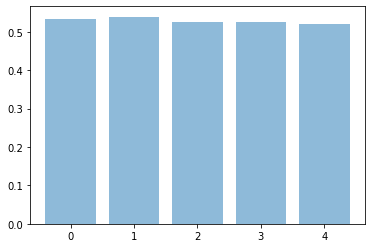

RandomForestClassifier(random_state=10) Cross Validation Scores : [0.53624733 0.52680475 0.52604325 0.53266332 0.52269266]


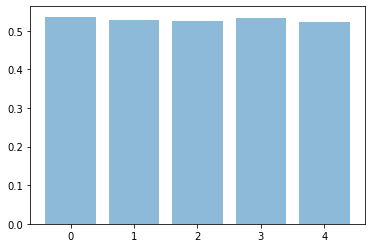

GaussianNB() Cross Validation Scores : [0.26439232 0.25022845 0.26698142 0.24440384 0.25799574]


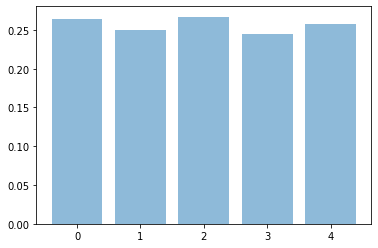

KNeighborsClassifier() Cross Validation Scores : [0.46954005 0.46116357 0.45918367 0.46048424 0.45994517]


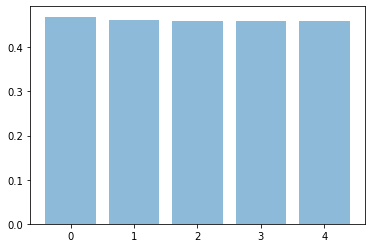

In [154]:
models = [DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10),GaussianNB(),KNeighborsClassifier()]

for i in models:
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    cv_scores = cross_val_score(i,Xtrain,ytrain,cv= skf,scoring='recall')
    print('{} Cross Validation Scores : {}'.format(i,cv_scores))
    plt.bar(np.arange(len(cv_scores)), cv_scores, align='center', alpha=0.5)
    plt.show()

    #Based on these Graphs, we could assume that there is NO Sampling Bias happening on our Data!

In [155]:
decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree_model = decision_tree.fit(Xtrain,ytrain)

ypred = decision_tree.predict(Xtest)

print('Classification Report :\n',metrics.classification_report(ytest,ypred))

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.58      0.58     16458
           1       0.52      0.53      0.52     14071

    accuracy                           0.56     30529
   macro avg       0.55      0.55      0.55     30529
weighted avg       0.56      0.56      0.56     30529



#### Checking the feature Importances for Decision Tree Model

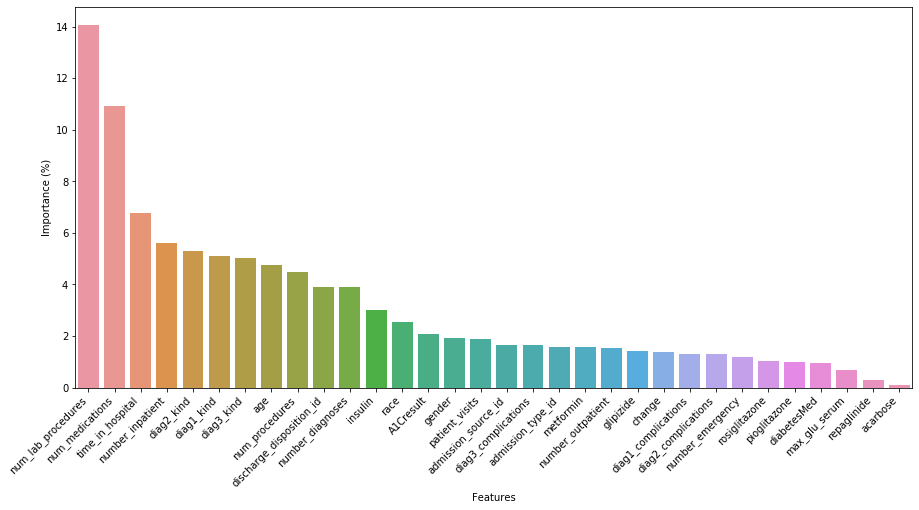

In [156]:
feat_importance = pd.DataFrame(decision_tree_model.feature_importances_*100,Xtrain.columns).sort_values(0,ascending=False).reset_index()
feat_importance.columns = ['Features','Importance (%)']

plt.figure(figsize=(15,7))
sns.barplot(feat_importance.Features,feat_importance['Importance (%)'])
plt.xticks(rotation=45,ha='right');

In [157]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=10)

rf_model.fit(Xtrain,ytrain)

ypred = rf_model.predict(Xtest)

print('Classification Report :')
print(metrics.classification_report(ytest,ypred))

Classification Report :
              precision    recall  f1-score   support

           0       0.65      0.72      0.68     16458
           1       0.62      0.54      0.58     14071

    accuracy                           0.64     30529
   macro avg       0.63      0.63      0.63     30529
weighted avg       0.63      0.64      0.63     30529



#### Checking the feature Importances for Random Forest Model

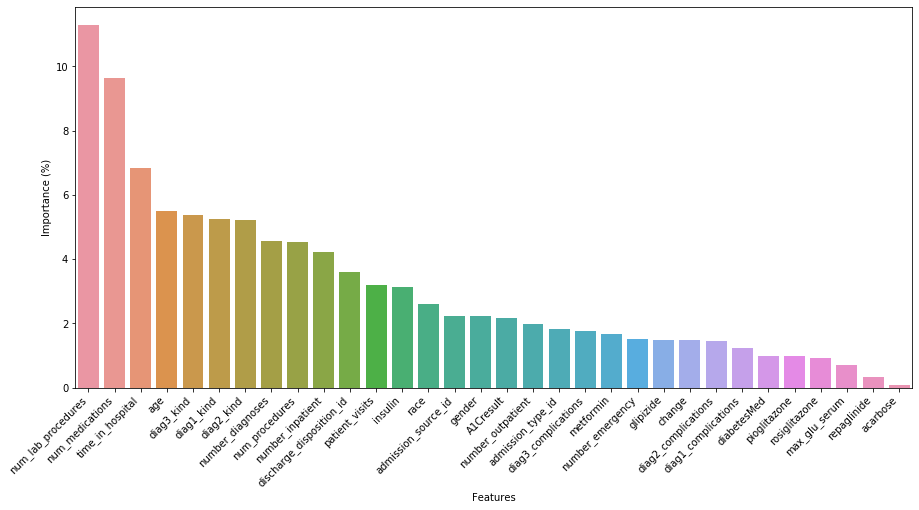

In [158]:
feat_importance = pd.DataFrame(rf_model.feature_importances_*100,Xtrain.columns).sort_values(0,ascending=False).reset_index()
feat_importance.columns = ['Features','Importance (%)']

plt.figure(figsize=(15,7))
sns.barplot(feat_importance.Features,feat_importance['Importance (%)'])
plt.xticks(rotation=45,ha='right');

As our focus in on the Recall Score of 1 category, We could see that both the models of Decision Tree and Random Forest are good for it, but Random forest is better here as recall for class 0 is also higher!

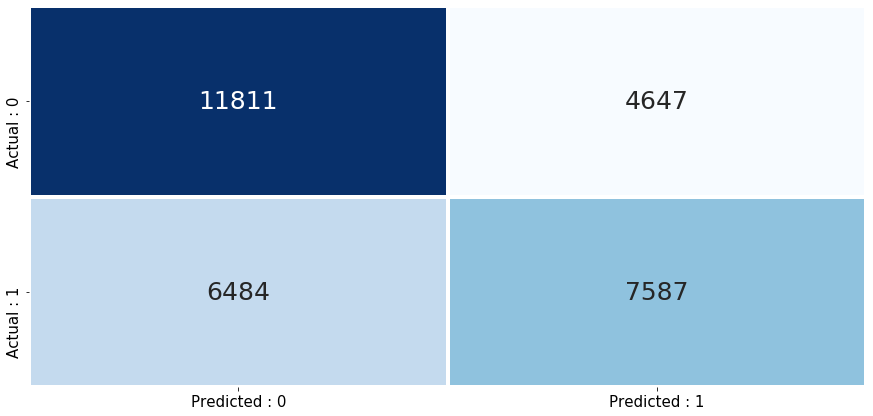

In [159]:
cm = metrics.confusion_matrix(ytest,ypred)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [160]:
from sklearn.svm import SVC 

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,stratify = y,test_size=0.90,random_state=10)

svm_classifier = SVC() 
svm_classifier.fit(Xtrain, ytrain) 
svm_pred = svm_classifier.predict(Xtest) 
print('Classification Report :\n',metrics.classification_report(ytest,svm_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.91      0.71     49375
           1       0.70      0.25      0.36     42212

    accuracy                           0.60     91587
   macro avg       0.64      0.58      0.54     91587
weighted avg       0.64      0.60      0.55     91587



Applied SVM classifier on 10% training data due to the complexity issues. Although there wasn't any kind of sampling bias, SVM was not able to perform in this case!

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
Xtrain2 = pca.fit_transform(Xtrain)
svm_classifier = SVC() 
svm_classifier.fit(Xtrain2, ytrain) 

SVC()

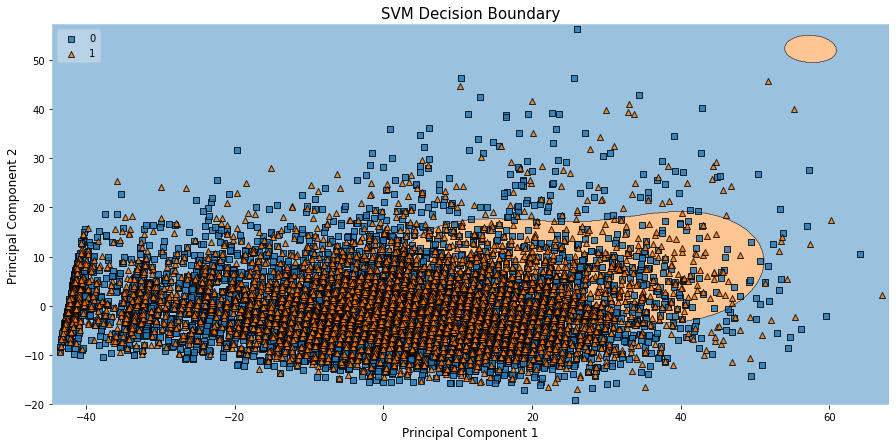

In [162]:
plt.figure(figsize=(15,7))
plot_decision_regions(Xtrain2, ytrain.values, clf=svm_classifier, legend=2)
plt.xlabel('Principal Component 1',fontsize=12)
plt.ylabel('Principal Component 2',fontsize=12)
plt.title('SVM Decision Boundary',fontsize=15)
plt.show()

We can see that there is **NO** clear Decision bounday possible from SVM for the first 2 Principal Components!

In [163]:
# Gaussion NB
gb = GaussianNB()
gb_model = gb.fit(Xtrain,ytrain)
gb_pred = gb.predict(Xtest)

print('Classification Report :\n',metrics.classification_report(ytest,gb_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.88      0.70     49375
           1       0.66      0.27      0.39     42212

    accuracy                           0.60     91587
   macro avg       0.63      0.58      0.55     91587
weighted avg       0.62      0.60      0.56     91587



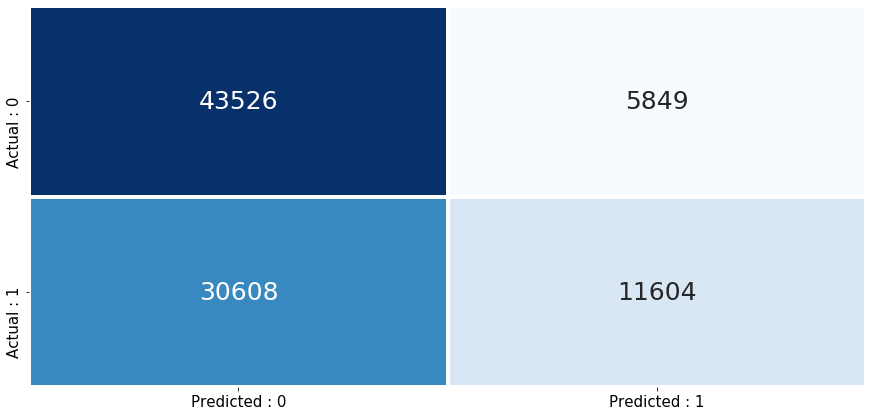

In [164]:
cm = metrics.confusion_matrix(ytest,gb_pred)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

Gaussian Naive Bayes is not able to get good results on this data although the overall accuracy based on GNB model is 60%.

**BUT** the main object of **minimizing False Negatives** is failing here

### Boosting Algorithms
    # Lets try boosting to see the improvement in performance!

In [165]:
ada_model = AdaBoostClassifier(n_estimators=100,random_state =10)
ada_model.fit(Xtrain,ytrain)
ada_pred = ada_model.predict(Xtest)

print('Classification Report :')
print(metrics.classification_report(ytest,ada_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.75      0.69     49375
           1       0.63      0.49      0.55     42212

    accuracy                           0.63     91587
   macro avg       0.63      0.62      0.62     91587
weighted avg       0.63      0.63      0.62     91587



In [166]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=10)
gb_model.fit(Xtrain,ytrain)
gb_pred = gb_model.predict(Xtest)

print('Classification Report :')
print(metrics.classification_report(ytest,gb_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     49375
           1       0.63      0.50      0.56     42212

    accuracy                           0.64     91587
   macro avg       0.64      0.63      0.63     91587
weighted avg       0.64      0.64      0.63     91587



In [167]:
xgb_model = XGBClassifier()
xgb_model.fit(Xtrain,ytrain)
xgb_pred = xgb_model.predict(Xtest)

print('Classification Report :')
print(metrics.classification_report(ytest,xgb_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     49375
           1       0.63      0.50      0.56     42212

    accuracy                           0.64     91587
   macro avg       0.64      0.63      0.63     91587
weighted avg       0.64      0.64      0.63     91587



Although all these Boosting Algorithms are returning similar results 

**XGBoost** is the **BEST** out of these as its recall score for class 1 is comparatively higher!

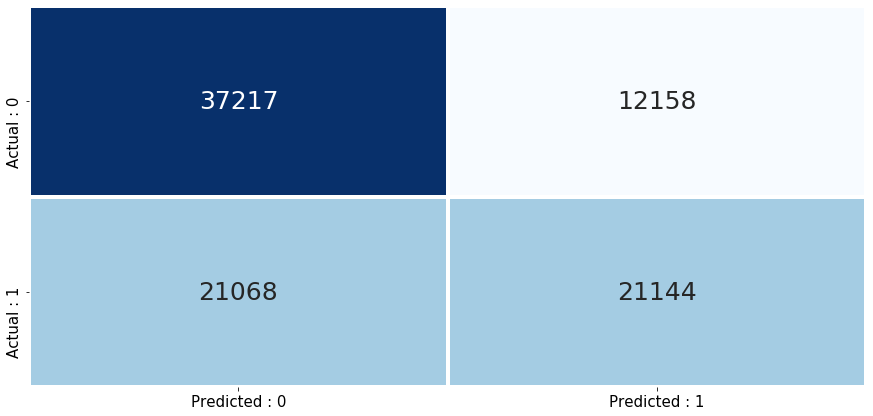

In [168]:
cm = metrics.confusion_matrix(ytest,xgb_pred)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Logistic Regression

In [169]:
logreg_model = Logit(ytrain,sma.add_constant(Xtrain)).fit()
logreg_pred_proba = logreg_model.predict(sma.add_constant(Xtest))

logreg_pred = [1 if i>=0.5 else 0 for i in logreg_pred_proba]
print('Classification Report :\n',metrics.classification_report(ytest,logreg_pred))

Optimization terminated successfully.
         Current function value: 0.645288
         Iterations 6
Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.80      0.69     49375
           1       0.64      0.42      0.51     42212

    accuracy                           0.62     91587
   macro avg       0.63      0.61      0.60     91587
weighted avg       0.63      0.62      0.61     91587



In [170]:
# Hyper Parameter Tuning on Logisic Regression
parameters = [{'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet']}]

# Improving Recall is Objective!
search = RandomizedSearchCV(LogisticRegression(), parameters, n_iter=500, scoring='recall', n_jobs=-1, cv=5, random_state=1)
search.fit(Xtrain,ytrain)
search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2'}

In [171]:
logreg_model = LogisticRegression(solver=search.best_params_['solver'],penalty=search.best_params_['penalty']).fit(sma.add_constant(Xtrain),ytrain)
logreg_pred = logreg_model.predict(sma.add_constant(Xtest))

print('Classification Report :\n',metrics.classification_report(ytest,logreg_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.80      0.69     49375
           1       0.64      0.42      0.51     42212

    accuracy                           0.62     91587
   macro avg       0.63      0.61      0.60     91587
weighted avg       0.63      0.62      0.61     91587



* We can see here that **Logistic Regression** is also returning the same Scores, but this is better model than **Decision Tree**!

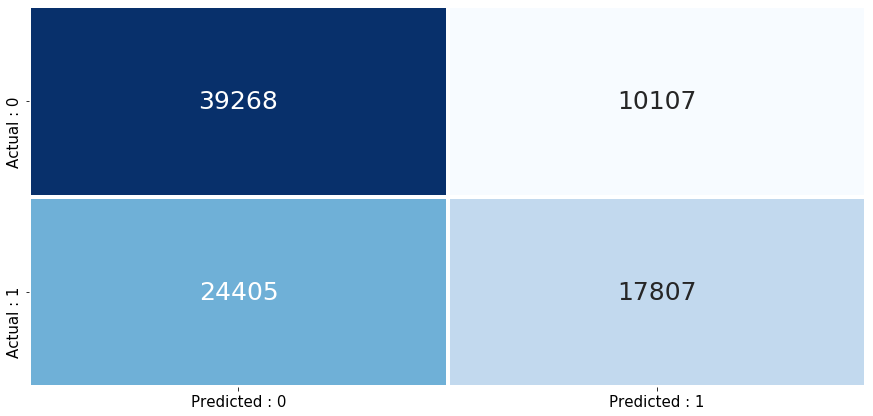

In [172]:
cm = metrics.confusion_matrix(ytest,logreg_pred)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [173]:
ridge = RidgeClassifier().fit(Xtrain,ytrain)
ridge_pred_train = ridge.predict(Xtrain)
ridge_pred_test = ridge.predict(Xtest)
print('Classification Report :\n',metrics.classification_report(ytest,ridge_pred_test))

print('\t\tTraining Accuracy Score \t:',metrics.accuracy_score(ytrain,ridge_pred_train))
print('\t\tTesting Accuracy Score \t:',metrics.accuracy_score(ytest,ridge_pred_test))

# Overfitting Handled!

Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.80      0.69     49375
           1       0.64      0.41      0.50     42212

    accuracy                           0.62     91587
   macro avg       0.62      0.60      0.60     91587
weighted avg       0.62      0.62      0.60     91587

		Training Accuracy Score 	: 0.6221501572327044
		Testing Accuracy Score 	: 0.6201207594964351


* Performing Regularization on Logistic Regression is not Helpful, as ultimate result is Same!

In [174]:
# models = [DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10)]
models = [LogisticRegression(random_state=10),DecisionTreeClassifier(random_state=10),RandomForestClassifier(random_state=10),GaussianNB(),KNeighborsClassifier()]

for i in models:
    j = i
    if j == 'LogisticRegression(random_state=10)':
        jm = j.fit(sma.add_constant(Xtrain),ytrain)
        jm_prob_tr = jm.predict(sma.add_constant(Xtrain))
        jm_prob_ts = jm.predict(sma.add_constant(Xtest))
        train_pred = [1 if i>=0.5 else 0 for i in jm_prob_tr]
        test_pred = [1 if i>=0.5 else 0 for i in jm_prob_ts]
    else:
        jm = j.fit(Xtrain,ytrain)
        train_pred = jm.predict(Xtrain)
        test_pred = jm.predict(Xtest)
    print('{} Model :'.format(i))
    print('\t\tTraining Accuracy Score \t:',metrics.accuracy_score(ytrain,train_pred))
    print('\t\tTesting Accuracy Score \t:',metrics.accuracy_score(ytest,test_pred))
    print()

LogisticRegression(random_state=10) Model :
		Training Accuracy Score 	: 0.6234276729559748
		Testing Accuracy Score 	: 0.6228504045333945

DecisionTreeClassifier(random_state=10) Model :
		Training Accuracy Score 	: 1.0
		Testing Accuracy Score 	: 0.5586928275847008

RandomForestClassifier(random_state=10) Model :
		Training Accuracy Score 	: 1.0
		Testing Accuracy Score 	: 0.6316726172928472

GaussianNB() Model :
		Training Accuracy Score 	: 0.6053459119496856
		Testing Accuracy Score 	: 0.6019413235502855

KNeighborsClassifier() Model :
		Training Accuracy Score 	: 0.7258254716981132
		Testing Accuracy Score 	: 0.5517158548702327



We can see that there is Clear Overfitting if the Models of Decision Tree and Random Forest! 
### Lets Perform Hyperparameter Tuning and Feature Selection on the Models!!

In [175]:
feature_selection_df_v1.to_csv('feature_selection_df_v1.csv',index=False)

### SFS on Decision Tree Model

In [176]:
# Lets Try Sequential Feature Selector to find the best features for Decision Tree Model based on Recall!
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

dt_sfs = SFS(estimator = DecisionTreeClassifier(),forward = True, scoring = "recall", verbose = 2, k_features = 'best',cv=10)

dt_sfsmodel = dt_sfs.fit(Xtrain, ytrain)
print("Features: ", dt_sfsmodel.k_feature_names_)
print("Recall Score: ", dt_sfsmodel.k_score_)

dt_best_features = list(dt_sfsmodel.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    2.0s finished

[2021-03-31 19:48:07] Features: 1/32 -- score: 0.538592750533049[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    2.7s finished

[2021-03-31 19:48:10] Features: 2/32 -- score: 0.5509594882729212[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.2s finished

[2021-03-31 19:48:13] Features: 3/32 -- score: 0.5603411513859275[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished

[2021-03-31 19:50:37] Features: 28/32 -- score: 0.5238805970149254[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished

[2021-03-31 19:50:41] Features: 29/32 -- score: 0.5307036247334754[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished

[2021-03-31 19:50:43] Features: 30/32 -- score: 0.5313432835820896[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s finished

[2021-03-31 19:50:45] Features: 31/

Features:  ('number_diagnoses', 'race', 'discharge_disposition_id', 'diag1_complications', 'A1Cresult', 'glipizide', 'pioglitazone')
Recall Score:  0.5793176972281451


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished

[2021-03-31 19:50:46] Features: 32/32 -- score: 0.5309168443496801

### SFS on Random Forest Model

##### Due to the Complexity, SFS on Random Forest was avoided!

### Finding the Best Features based on Decision Tree Model

In [177]:
final_features = set(dt_best_features)#.extend(rf_best_features))
print('Finally Selected Features :',final_features)

Finally Selected Features : {'diag1_complications', 'race', 'number_diagnoses', 'A1Cresult', 'glipizide', 'discharge_disposition_id', 'pioglitazone'}


## Split the Final Data to Training and Testing Sets

In [178]:
feature_selection_df_v1[final_features].shape,feature_selection_df_v1.shape

((101763, 7), (101763, 33))

In [179]:
X = feature_selection_df_v1[final_features]
y = feature_selection_df_v1.readmitted

nXtrain,nXtest, nytrain,nytest = train_test_split(X,y,stratify=y,test_size=0.3,random_state=10)

## Lets apply Hyper Parameter Tuning on these features based Data!

### Decision Tree Hyperparameter Tuning!

In [180]:
parameters = [{'criterion' : ['entropy','gini'],
               'max_depth' : range(5,18),
               'min_samples_split' : range(10,50)}]

dt_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=10),param_distributions=parameters,cv = 5)
dt_search.fit(nXtrain,nytrain)
print('Best Parameters :',dt_search.best_params_)

dt_tune = DecisionTreeClassifier(criterion=dt_search.best_params_['criterion'],max_depth=dt_search.best_params_['max_depth'],min_samples_split=dt_search.best_params_['min_samples_split'])
dt_tune_model = dt_tune.fit(nXtrain,nytrain)
dt_tune_pred_train = dt_tune_model.predict(nXtrain)
dt_tune_pred_test = dt_tune_model.predict(nXtest)

print('Classification Report :\n',metrics.classification_report(nytest,dt_tune_pred_test))

print('\nChecking for Overfitting/Underfitting:')
print('\t\tTraining Accuracy Score \t:',metrics.accuracy_score(nytrain,dt_tune_pred_train))
print('\t\tTesting Accuracy Score \t:',metrics.accuracy_score(nytest,dt_tune_pred_test))

# Handled Overfitting!

Best Parameters : {'min_samples_split': 12, 'max_depth': 8, 'criterion': 'entropy'}
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.55      0.58     16458
           1       0.52      0.58      0.55     14071

    accuracy                           0.56     30529
   macro avg       0.56      0.56      0.56     30529
weighted avg       0.57      0.56      0.56     30529


Checking for Overfitting/Underfitting:
		Training Accuracy Score 	: 0.5738832579947778
		Testing Accuracy Score 	: 0.563660781551967


#### Lets check the Feature Importances based on Decision Tree

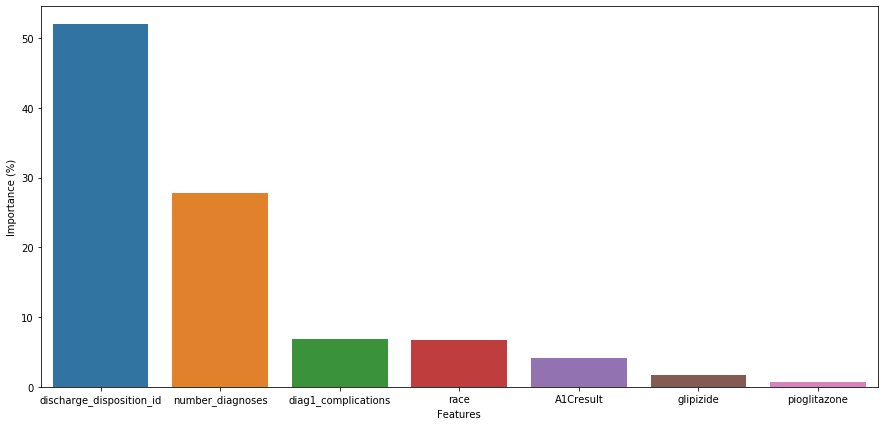

In [181]:
feat_importance = pd.DataFrame(dt_tune_model.feature_importances_*100,nXtrain.columns).sort_values(0,ascending=False).reset_index()
feat_importance.columns = ['Features','Importance (%)']

plt.figure(figsize=(15,7))
sns.barplot(feat_importance.Features,feat_importance['Importance (%)']);

* No Over/Underfitting!
* Although Recall score for Class 0 has reduced, Recall Score for Class 1(Re-admission) has improved from hyperparameter tuning!
* My False Negatives are comparatively lesser from previous model --> Hospitals get a little better idea of the person who is more prone to readmission, as we would be able to classify readmission as readmission better in this case!

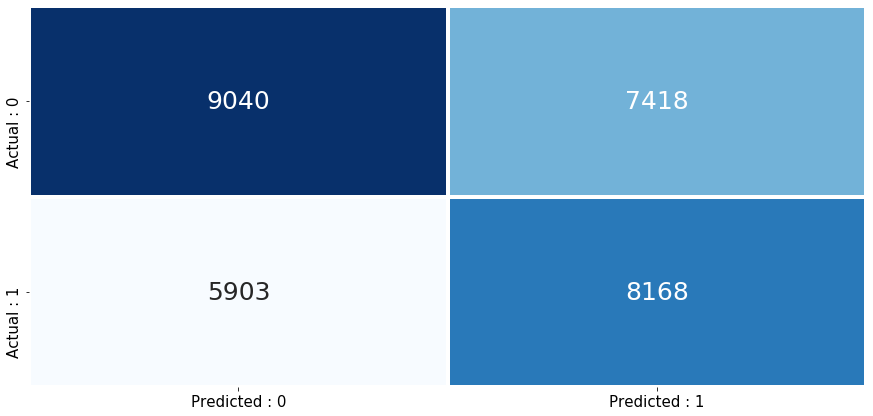

In [182]:
cm = metrics.confusion_matrix(nytest,dt_tune_pred_test)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Random Forest Hyperparameter Tuning!

In [183]:
parameters = [{'n_estimators' : range(100,1000,100),
               'criterion' : ['entropy','gini'],
               'max_depth' : range(5,18),
               'min_samples_split' : range(10,50)}]

rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=10),param_distributions=parameters,cv = 5)
rf_search.fit(nXtrain,nytrain)
print('Best Parameters :',rf_search.best_params_)

rf_tune = RandomForestClassifier(n_estimators=rf_search.best_params_['n_estimators'],criterion=rf_search.best_params_['criterion'],max_depth=rf_search.best_params_['max_depth'],min_samples_split=rf_search.best_params_['min_samples_split'])
rf_tune_model = rf_tune.fit(nXtrain,nytrain)
rf_tune_pred_train = rf_tune_model.predict(nXtrain)
rf_tune_pred_test = rf_tune_model.predict(nXtest)

print('Classification Report :\n',metrics.classification_report(nytest,rf_tune_pred_test))

print('\nChecking for Overfitting/Underfitting:')
print('\t\tTraining Accuracy Score \t:',metrics.accuracy_score(nytrain,rf_tune_pred_train))
print('\t\tTesting Accuracy Score \t:',metrics.accuracy_score(nytest,rf_tune_pred_test))

# Handled Overfitting!

Best Parameters : {'n_estimators': 500, 'min_samples_split': 14, 'max_depth': 10, 'criterion': 'entropy'}
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.56      0.58     16458
           1       0.53      0.57      0.55     14071

    accuracy                           0.56     30529
   macro avg       0.56      0.56      0.56     30529
weighted avg       0.57      0.56      0.56     30529


Checking for Overfitting/Underfitting:
		Training Accuracy Score 	: 0.5803689249515681
		Testing Accuracy Score 	: 0.5642176291395067


#### Lets check the Feature Importances based on Random Forest

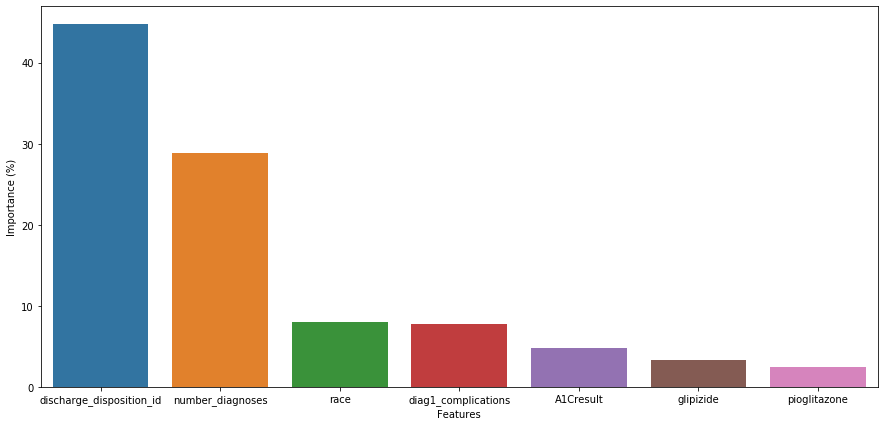

In [184]:
feat_importance = pd.DataFrame(rf_tune_model.feature_importances_*100,nXtrain.columns).sort_values(0,ascending=False).reset_index()
feat_importance.columns = ['Features','Importance (%)']

plt.figure(figsize=(15,7))
sns.barplot(feat_importance.Features,feat_importance['Importance (%)']);

* No Over/Underfitting!
* Overall Accuracy has reduced!
* Although Recall score for Class 0 has reduced, Recall Score for Class 1(Re-admission) has improved from hyperparameter tuning!

* My False Negatives are comparatively lesser from previous model --> Hospitals get a little better idea of the person who is more prone to readmission, as we would be able to classify readmission as readmission better in this case!

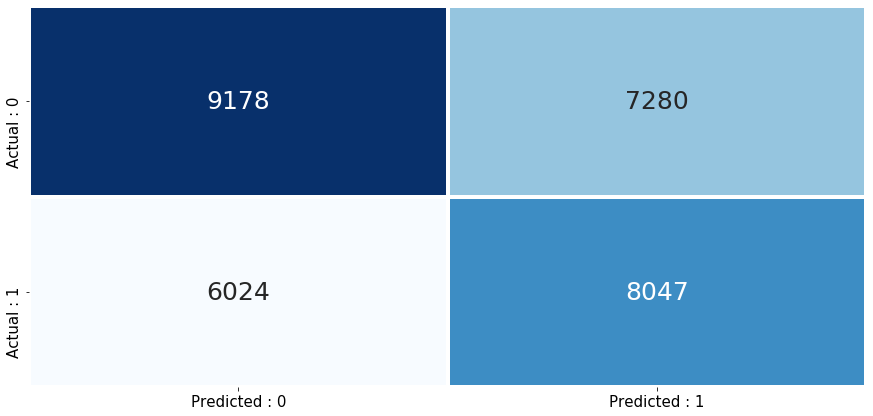

In [185]:
cm = metrics.confusion_matrix(nytest,rf_tune_pred_test)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

## Applying SVM post Feature Selection

In [186]:
from sklearn.svm import SVC 

nXtrain,nXtest,nytrain,nytest = train_test_split(X,y,stratify = y,test_size=0.80,random_state=10)

svm_classifier = SVC() 
svm_classifier.fit(nXtrain, nytrain)
svm_pred = svm_classifier.predict(nXtest) 
print('Classification Report :\n',metrics.classification_report(nytest,svm_pred))

Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.53      0.56     43889
           1       0.52      0.60      0.56     37522

    accuracy                           0.56     81411
   macro avg       0.56      0.56      0.56     81411
weighted avg       0.57      0.56      0.56     81411



* SVM has not been able to accurately predict the Classes!
* Although Recall for Class 0(Non-Readmission is Higher) implying lesser Type-I Error,i.e., Patients not having to readmit are being predicted to get readmitted. This would not be a bigger issue when compared to the opposite case! 
* Recall for Class 1(Readmission) is **Very Less**, thus increasing the Cost towards Hospitals ultimately!

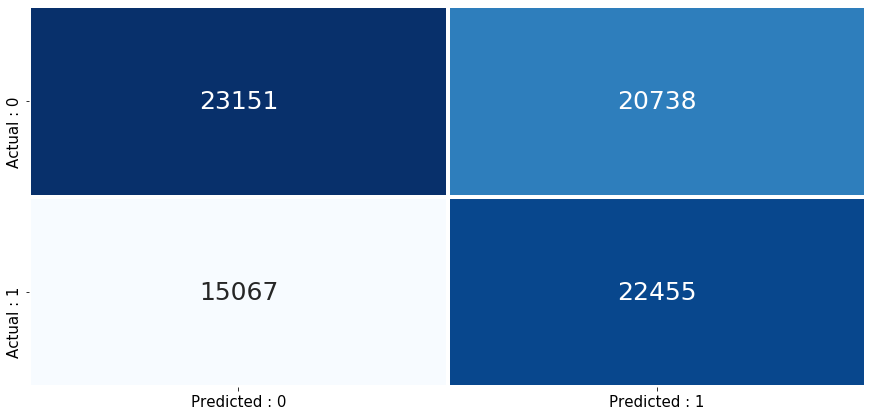

In [187]:
cm = metrics.confusion_matrix(nytest,svm_pred)
conf_matrix = pd.DataFrame(cm,index = ['Actual : 0','Actual : 1'], columns=['Predicted : 0','Predicted : 1'])

plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size':25},lw = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

------------------------------------